### RQ4: Why do some cases correlate and others don’t?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

/tmp/ipykernel_22286/3091132766.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df_attributes = pd.read_csv('data/resolution_composition.csv')
df_attributes

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta
0,776662,0.42,0.92,0.25,0.75,0.33,v1 v2 (v1_2) v1 (v1_2) v1 v2,1,1,16.67,8.33,6,12,6.0
1,776782,0.57,0.75,0.41,0.59,0.32,v2 v1 (v1_2) v1 (v1_2) v1 (v1_2) v2 (v1_2) v2...,2,4,6.06,7.55,33,53,20.0
2,776793,0.75,0.25,0.75,0.25,0.00,v2 v1,1,0,25.00,0.00,4,1,-3.0
3,776828,0.33,0.67,0.33,0.67,0.00,v2 v1 v2,2,0,66.67,0.00,3,2,-1.0
4,776863,0.25,0.75,0.25,0.75,0.00,v2 v1,0,1,0.00,25.00,1,4,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13568,1658666,0.50,0.50,0.50,0.50,0.00,v2 v1,1,1,50.00,50.00,2,2,0.0
13569,1658014,-1.00,-1.00,-1.00,-1.00,-1.00,NaN,-1,-1,-1.00,-1.00,-1,-1,NaN
13570,1658028,0.60,0.60,0.50,0.50,0.20,v1 v2 (v1_2) v1 v2,2,11,40.00,78.57,5,14,9.0
13571,1658029,0.00,1.00,0.00,1.00,0.00,v2,0,1,0.00,50.00,0,2,2.0


In [3]:
df_chunk_details = pd.read_csv('data/dataset_details.csv')
df_chunk_details

,chunk_id,chunk_size,solution_size,candidate_size,chunk_size_char,solution_size_char,candidate_size_char,v1_size_char,v2_size_char
0,776662,18,12,14,985,632,762,390,595
1,776782,113,101,47,4004,3136,1644,1890,2114
2,776793,6,5,3,331,275,204,269,62
3,776828,5,3,0,232,136,0,126,106
4,776863,6,5,4,140,96,99,51,89
...,...,...,...,...,...,...,...,...,...
10772,1658665,4,3,3,159,80,113,74,85
10773,1658666,4,3,4,159,80,162,74,85
10774,1658028,23,6,7,830,243,224,246,584
10775,1658029,2,1,2,93,39,94,0,93


In [4]:
df_attributes = df_attributes.merge(df_chunk_details, on='chunk_id')
df_attributes

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,...,v2_size,chunk_size_delta,chunk_size,solution_size,candidate_size,chunk_size_char,solution_size_char,candidate_size_char,v1_size_char,v2_size_char
0,776662,0.42,0.92,0.25,0.75,0.33,v1 v2 (v1_2) v1 (v1_2) v1 v2,1,1,16.67,...,12,6.0,18,12,14,985,632,762,390,595
1,776782,0.57,0.75,0.41,0.59,0.32,v2 v1 (v1_2) v1 (v1_2) v1 (v1_2) v2 (v1_2) v2...,2,4,6.06,...,53,20.0,113,101,47,4004,3136,1644,1890,2114
2,776793,0.75,0.25,0.75,0.25,0.00,v2 v1,1,0,25.00,...,1,-3.0,6,5,3,331,275,204,269,62
3,776828,0.33,0.67,0.33,0.67,0.00,v2 v1 v2,2,0,66.67,...,2,-1.0,5,3,0,232,136,0,126,106
4,776863,0.25,0.75,0.25,0.75,0.00,v2 v1,0,1,0.00,...,4,3.0,6,5,4,140,96,99,51,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10772,1658665,0.50,0.50,0.50,0.50,0.00,v2 v1,1,1,50.00,...,2,0.0,4,3,3,159,80,113,74,85
10773,1658666,0.50,0.50,0.50,0.50,0.00,v2 v1,1,1,50.00,...,2,0.0,4,3,4,159,80,162,74,85
10774,1658028,0.60,0.60,0.50,0.50,0.20,v1 v2 (v1_2) v1 v2,2,11,40.00,...,14,9.0,23,6,7,830,243,224,246,584
10775,1658029,0.00,1.00,0.00,1.00,0.00,v2,0,1,0.00,...,2,2.0,2,1,2,93,39,94,0,93


In [5]:
df_dataset = pd.read_csv('data/INITIAL_DATASET.csv')
df_dataset

,chunk_id,developerdecision,line_start,line_end,line_separator,kind_conflict,url,project,project_user,project_name,path,file_name,sha,leftsha,rightsha,basesha
0,776661,Version 1,94,98,96,If statement,https://github.com/3scale/3scale_ws_api_for_java,3scale/3scale_ws_api_for_java,3scale,3scale_ws_api_for_java,3scale/3scale_ws_api_for_java/src/main/java/ne...,HttpSenderImpl.java,c3b5f5d43f5699e2e4d698bd32a74dad9ac1d477,78eceb43ad7a9dd89e7c2f36f82b0e36061e40ff,85d75a23e94054bbb8c219f21036872149150a90,5277a08c45e15394d28fa2c059746fadd4601585
1,776662,Combination,80,100,87,"If statement, Method invocation, Return statem...",https://github.com/3scale/3scale_ws_api_for_java,3scale/3scale_ws_api_for_java,3scale,3scale_ws_api_for_java,3scale/3scale_ws_api_for_java/src/net/threesca...,Api2Impl.java,332b6ed4e324199565e235cd915368f9bc1b43d2,4650578dee712b2b08f2ead2bf6a531f82b1e0e9,d623f491daa2f14f06f53338265d28a489138a6b,1d2ec0a2016edab9736e163e09d7a994af00ccbf
2,776697,Version 2,70,132,131,"Attribute, Method invocation",https://github.com/bndtools/bndtools,bndtools/bndtools,bndtools,bndtools,bndtools/bndtools/bndtools.core/src/bndtools/P...,Plugin.java,41b35cd3c4fa423382bac2a22d0da09da6008730,4bed1de20aa8580200ed6f1b4edd585c2972a0e2,7486a0c479d1d221f3dc225bf79a2cd7383e9543,04e207ec8150eaca40ccc3fb0ecda0f4312aa2c8
3,776700,Version 1,304,354,322,"Comment, For statement, If statement, Method i...",https://github.com/bndtools/bndtools,bndtools/bndtools,bndtools,bndtools,bndtools/bndtools/bndtools.core/src/bndtools/v...,ImportsExportsView.java,8f113c6f5d090ff539f3c342591a575b976fd23d,350da937afff3f6e47234ba0831c1976adb7c472,bd65c61548fb0eafd7101c9f480771e3faf0a6ab,3c8c593532fa0ac85312ac273ca5c8865a9430e6
4,776710,Version 2,125,131,128,Method invocation,https://github.com/cwensel/cascading,cwensel/cascading,cwensel,cascading,cwensel/cascading/cascading-core/src/main/java...,URISanitizer.java,567eec5076644db52aef9a4ef3ac06bb1d3b1878,3bc51bd2779e15e7aced4679b7e9ce7d1306f2e4,3155ab278e684b614fc68c136b3591638c32b07d,f00081a06e3423ff926109532ffa047851c47af0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175800,1658387,Version 1,173,227,200,"Method signature, Try statement",https://github.com/allwinner-ics/platform_fram...,allwinner-ics/platform_frameworks_base,allwinner-ics,platform_frameworks_base,allwinner-ics/platform_frameworks_base/tests/D...,LoadTestsAutoTest.java,d3f14a625e74a93e52b8b9aa5363a5de50129ea9,40f5a4ea3bc90e43a442ab336f2342020bba86b3,843ef36f7b96cc19ea7d2996b7c8661b41ec3452,358d23017d0d6c4636eb7599ae7a9b48108899a3
175801,1658389,Version 1,833,841,837,"Method invocation, Method signature, Return st...",https://github.com/allwinner-ics/platform_fram...,allwinner-ics/platform_frameworks_base,allwinner-ics,platform_frameworks_base,allwinner-ics/platform_frameworks_base/wifi/ja...,WifiManager.java,d3f14a625e74a93e52b8b9aa5363a5de50129ea9,40f5a4ea3bc90e43a442ab336f2342020bba86b3,843ef36f7b96cc19ea7d2996b7c8661b41ec3452,358d23017d0d6c4636eb7599ae7a9b48108899a3
175802,1658390,Version 1,859,875,867,"Comment, Method invocation, Method signature, ...",https://github.com/allwinner-ics/platform_fram...,allwinner-ics/platform_frameworks_base,allwinner-ics,platform_frameworks_base,allwinner-ics/platform_frameworks_base/wifi/ja...,WifiManager.java,d3f14a625e74a93e52b8b9aa5363a5de50129ea9,40f5a4ea3bc90e43a442ab336f2342020bba86b3,843ef36f7b96cc19ea7d2996b7c8661b41ec3452,358d23017d0d6c4636eb7599ae7a9b48108899a3
175803,1658391,Version 1,890,906,898,"Comment, Method invocation, Method signature, ...",https://github.com/allwinner-ics/platform_fram...,allwinner-ics/platform_frameworks_base,allwinner-ics,platform_frameworks_base,allwinner-ics/platform_frameworks_base/wifi/ja...,WifiManager.java,d3f14a625e74a93e52b8b9aa5363a5de50129ea9,40f5a4ea3bc90e43a442ab336f2342020bba86b3,843ef36f7b96cc19ea7d2996b7c8661b41ec3452,358d23017d0d6c4636eb7599ae7a9b48108899a3


In [6]:
df_results = pd.read_csv('results_experiment_similarity_thousand.csv')
df_results

,chunk_id,candidate_id,v1_gestalt_sim,v2_gestalt_sim,solution_gestalt_sim,aggregate_mean_gestalt,aggregate_harmonic_mean_gestalt,aggregate_min_gestalt,aggregate_max_gestalt,error
0,964152,0,0.410959,0.718954,0.568266,0.564957,0.522979,0.410959,0.718954,NaN
1,964152,1,0.331288,0.817337,0.680556,0.574313,0.471475,0.331288,0.817337,NaN
2,964152,2,0.983607,0.244344,0.290323,0.613975,0.391446,0.244344,0.983607,NaN
3,964152,3,0.289017,0.852853,0.758389,0.570935,0.431729,0.289017,0.852853,NaN
4,964152,4,0.550459,0.490706,0.564103,0.520583,0.518868,0.490706,0.550459,NaN
...,...,...,...,...,...,...,...,...,...,...
4976503,1392173,2,0.905923,0.996540,0.960000,0.951232,0.949073,0.905923,0.996540,NaN
4976504,1392173,3,0.956522,0.870432,0.910256,0.913477,0.911448,0.870432,0.956522,NaN
4976505,1392173,4,0.949833,0.956811,1.000000,0.953322,0.953309,0.949833,0.956811,NaN
4976506,1392173,5,0.665116,0.666667,0.650113,0.665891,0.665891,0.665116,0.666667,NaN


In [7]:
selected_chunks = pd.read_csv('data/chunk_ids_list.csv')
df_results = df_results[df_results['chunk_id'].isin(selected_chunks['chunk_id'].unique())]
df_results

,chunk_id,candidate_id,v1_gestalt_sim,v2_gestalt_sim,solution_gestalt_sim,aggregate_mean_gestalt,aggregate_harmonic_mean_gestalt,aggregate_min_gestalt,aggregate_max_gestalt,error
0,964152,0,0.410959,0.718954,0.568266,0.564957,0.522979,0.410959,0.718954,NaN
1,964152,1,0.331288,0.817337,0.680556,0.574313,0.471475,0.331288,0.817337,NaN
2,964152,2,0.983607,0.244344,0.290323,0.613975,0.391446,0.244344,0.983607,NaN
3,964152,3,0.289017,0.852853,0.758389,0.570935,0.431729,0.289017,0.852853,NaN
4,964152,4,0.550459,0.490706,0.564103,0.520583,0.518868,0.490706,0.550459,NaN
...,...,...,...,...,...,...,...,...,...,...
4976503,1392173,2,0.905923,0.996540,0.960000,0.951232,0.949073,0.905923,0.996540,NaN
4976504,1392173,3,0.956522,0.870432,0.910256,0.913477,0.911448,0.870432,0.956522,NaN
4976505,1392173,4,0.949833,0.956811,1.000000,0.953322,0.953309,0.949833,0.956811,NaN
4976506,1392173,5,0.665116,0.666667,0.650113,0.665891,0.665891,0.665116,0.666667,NaN


In [8]:
columns_gestalt = []
for column in df_results.columns:
    if 'gestalt' in column or 'chunk_id' in column or 'candidate_id' in column:
        columns_gestalt.append(column)
        
df_gestalt = df_results[columns_gestalt]

In [9]:
df_gestalt

,chunk_id,candidate_id,v1_gestalt_sim,v2_gestalt_sim,solution_gestalt_sim,aggregate_mean_gestalt,aggregate_harmonic_mean_gestalt,aggregate_min_gestalt,aggregate_max_gestalt
0,964152,0,0.410959,0.718954,0.568266,0.564957,0.522979,0.410959,0.718954
1,964152,1,0.331288,0.817337,0.680556,0.574313,0.471475,0.331288,0.817337
2,964152,2,0.983607,0.244344,0.290323,0.613975,0.391446,0.244344,0.983607
3,964152,3,0.289017,0.852853,0.758389,0.570935,0.431729,0.289017,0.852853
4,964152,4,0.550459,0.490706,0.564103,0.520583,0.518868,0.490706,0.550459
...,...,...,...,...,...,...,...,...,...
4976503,1392173,2,0.905923,0.996540,0.960000,0.951232,0.949073,0.905923,0.996540
4976504,1392173,3,0.956522,0.870432,0.910256,0.913477,0.911448,0.870432,0.956522
4976505,1392173,4,0.949833,0.956811,1.000000,0.953322,0.953309,0.949833,0.956811
4976506,1392173,5,0.665116,0.666667,0.650113,0.665891,0.665891,0.665116,0.666667


In [10]:
df_dataset = df_dataset[df_dataset['chunk_id'].isin(df_results['chunk_id'].unique())]
df_dataset

,chunk_id,developerdecision,line_start,line_end,line_separator,kind_conflict,url,project,project_user,project_name,path,file_name,sha,leftsha,rightsha,basesha
1,776662,Combination,80,100,87,"If statement, Method invocation, Return statem...",https://github.com/3scale/3scale_ws_api_for_java,3scale/3scale_ws_api_for_java,3scale,3scale_ws_api_for_java,3scale/3scale_ws_api_for_java/src/net/threesca...,Api2Impl.java,332b6ed4e324199565e235cd915368f9bc1b43d2,4650578dee712b2b08f2ead2bf6a531f82b1e0e9,d623f491daa2f14f06f53338265d28a489138a6b,1d2ec0a2016edab9736e163e09d7a994af00ccbf
15,776782,Combination,77,193,123,"Attribute, Comment, If statement, Method decla...",https://github.com/cwensel/cascading,cwensel/cascading,cwensel,cascading,cwensel/cascading/cascading-core/src/main/java...,ProcessEdge.java,b9e82842917f541594a67c44639201895caa4b28,ab3c048f47c6390ea1b6e42d09055f70938ae1ee,47ead800f9bbc26abd1b63016824ee72ff036eda,3adb2f6dd0ea442facd89869e237887c432c6795
16,776793,Combination,914,922,920,"Attribute, Method invocation",https://github.com/cwensel/cascading,cwensel/cascading,cwensel,cascading,cwensel/cascading/cascading-hadoop2-tez/src/ma...,Hadoop2TezFlowStep.java,b9e82842917f541594a67c44639201895caa4b28,ab3c048f47c6390ea1b6e42d09055f70938ae1ee,47ead800f9bbc26abd1b63016824ee72ff036eda,3adb2f6dd0ea442facd89869e237887c432c6795
22,776828,Combination,295,302,299,Method invocation,https://github.com/cwensel/cascading,cwensel/cascading,cwensel,cascading,cwensel/cascading/cascading-core/src/main/java...,FlowStepJob.java,bcd0ef81a0a8b9f64ea644e434d299585b4dbc75,a4a5911370c64c9454464dd326524671ba8e823c,f4ee1f4e73af1987f740b97a1b2b01e6cf2b025a,aa4f237bf48f4cee9d11a6fd8d41c419f53d600f
48,776863,Combination,136,144,138,"Method signature, Static initializer",https://github.com/cwensel/cascading,cwensel/cascading,cwensel,cascading,cwensel/cascading/cascading-core/src/main/java...,FlowPlanner.java,30c4b21552ad0db4e3ed3fe8dfed3e702945851a,4af71d950d9bd405dd3523f01d786873bf4aa9a8,aa4f237bf48f4cee9d11a6fd8d41c419f53d600f,23833acf9569c512710cf688066988f06a3459f1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173521,1652324,Combination,275,280,277,"Method signature, Try statement",https://github.com/gronnbeck/java-cluster-api,gronnbeck/java-cluster-api,gronnbeck,java-cluster-api,gronnbeck/java-cluster-api/src/system/SpaceImp...,SpaceImpl.java,fa8803d85fdd4495b0e475a87adcb7a0d64dcc4e,5653c5215d2d28b2823ca667716fbf26f153ca9b,700ffbf136aabde825b017aa87d8d76d20d12f69,5d490127d43161e3afe5ddab3dfa00da0b396199
173524,1652325,Combination,85,91,88,"If statement, Variable",https://github.com/gronnbeck/java-cluster-api,gronnbeck/java-cluster-api,gronnbeck,java-cluster-api,gronnbeck/java-cluster-api/src/system/WorkStea...,WorkStealer.java,fa8803d85fdd4495b0e475a87adcb7a0d64dcc4e,5653c5215d2d28b2823ca667716fbf26f153ca9b,700ffbf136aabde825b017aa87d8d76d20d12f69,5d490127d43161e3afe5ddab3dfa00da0b396199
175600,1658634,Combination,47,62,56,Attribute,https://github.com/xargsgrep/PortKnocker,xargsgrep/PortKnocker,xargsgrep,PortKnocker,xargsgrep/PortKnocker/app/src/main/java/com/xa...,MiscFragment.java,5835fb27160180763dd94f1bcc3f793a1e18c756,d167d1bfe398b0d7066a4ba2fed2c5e6c5647d92,ee3ba1641ccf56a03aea4b86f819068d48b24a3f,9edcb3fd8869082e0759e6715f3c05656f7ddd58
175687,1658665,Combination,9,15,12,Attribute,https://github.com/mseiwert/RoM,mseiwert/RoM,mseiwert,RoM,mseiwert/RoM/RoM-Server/src/com/rom/server/con...,Config.java,fa4b36ef85026af9b66c3fbad66224e7b657e107,17fc48e2753cf7ac5817fa23ba6beece64c1748d,7dbd3b572c76c6472cbbe1461687a1c154afd6bb,f65bee290e49b09dcb49647d18beb51d3b9d917b


In [11]:
df_results['error'].unique()

array([nan])

In [12]:
df_gestalt.describe()

,chunk_id,candidate_id,v1_gestalt_sim,v2_gestalt_sim,solution_gestalt_sim,aggregate_mean_gestalt,aggregate_harmonic_mean_gestalt,aggregate_min_gestalt,aggregate_max_gestalt
count,4.509340e+06,4.509340e+06,4.509340e+06,4.509340e+06,4.509340e+06,4.509340e+06,4.509340e+06,4.509340e+06,4.509340e+06
mean,1.105046e+06,4.543494e+02,6.061134e-01,6.100323e-01,6.303353e-01,6.080728e-01,5.540481e-01,4.907483e-01,7.253974e-01
std,2.124883e+05,2.957983e+02,2.243621e-01,2.223609e-01,1.856067e-01,1.551087e-01,2.185619e-01,2.190701e-01,1.557838e-01
min,7.766620e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.605690e+05,1.890000e+02,4.913151e-01,4.967033e-01,5.263158e-01,5.315400e-01,4.679818e-01,3.680000e-01,6.594259e-01
50%,1.069706e+06,4.360000e+02,6.544755e-01,6.575875e-01,6.647781e-01,6.406502e-01,6.160556e-01,5.390071e-01,7.483871e-01
75%,1.293352e+06,7.070000e+02,7.640095e-01,7.663280e-01,7.627119e-01,7.107064e-01,7.001610e-01,6.534653e-01,8.278388e-01
max,1.658666e+06,9.990000e+02,1.000000e+00,1.000000e+00,1.000000e+00,9.956012e-01,9.955990e-01,9.945355e-01,1.000000e+00


In [13]:
df_rq4 = df_gestalt.copy()
df_rq4['sim_rp'] = df_rq4['solution_gestalt_sim'] - df_rq4['aggregate_mean_gestalt']
df_rq4 = df_rq4.merge(df_attributes, on='chunk_id')
df_rq4 = df_rq4.merge(df_dataset, on='chunk_id')
df_rq4

,chunk_id,candidate_id,v1_gestalt_sim,v2_gestalt_sim,solution_gestalt_sim,aggregate_mean_gestalt,aggregate_harmonic_mean_gestalt,aggregate_min_gestalt,aggregate_max_gestalt,sim_rp,...,url,project,project_user,project_name,path,file_name,sha,leftsha,rightsha,basesha
0,964152,0,0.410959,0.718954,0.568266,0.564957,0.522979,0.410959,0.718954,0.003309,...,https://github.com/rhuss/jolokia,rhuss/jolokia,rhuss,jolokia,rhuss/jolokia/agent/core/src/main/java/org/jol...,AgentServlet.java,0c02036309fbee50de060b3275fcea8e9bb5caf6,e03f14c051016e88c1db74a9aef4210468468e30,06eae85dd6785f377f1962d427590eb1347b92a4,a9f23f9ae3ce3917dc391efdef8cb94b0bd74560
1,964152,1,0.331288,0.817337,0.680556,0.574313,0.471475,0.331288,0.817337,0.106243,...,https://github.com/rhuss/jolokia,rhuss/jolokia,rhuss,jolokia,rhuss/jolokia/agent/core/src/main/java/org/jol...,AgentServlet.java,0c02036309fbee50de060b3275fcea8e9bb5caf6,e03f14c051016e88c1db74a9aef4210468468e30,06eae85dd6785f377f1962d427590eb1347b92a4,a9f23f9ae3ce3917dc391efdef8cb94b0bd74560
2,964152,2,0.983607,0.244344,0.290323,0.613975,0.391446,0.244344,0.983607,-0.323653,...,https://github.com/rhuss/jolokia,rhuss/jolokia,rhuss,jolokia,rhuss/jolokia/agent/core/src/main/java/org/jol...,AgentServlet.java,0c02036309fbee50de060b3275fcea8e9bb5caf6,e03f14c051016e88c1db74a9aef4210468468e30,06eae85dd6785f377f1962d427590eb1347b92a4,a9f23f9ae3ce3917dc391efdef8cb94b0bd74560
3,964152,3,0.289017,0.852853,0.758389,0.570935,0.431729,0.289017,0.852853,0.187454,...,https://github.com/rhuss/jolokia,rhuss/jolokia,rhuss,jolokia,rhuss/jolokia/agent/core/src/main/java/org/jol...,AgentServlet.java,0c02036309fbee50de060b3275fcea8e9bb5caf6,e03f14c051016e88c1db74a9aef4210468468e30,06eae85dd6785f377f1962d427590eb1347b92a4,a9f23f9ae3ce3917dc391efdef8cb94b0bd74560
4,964152,4,0.550459,0.490706,0.564103,0.520583,0.518868,0.490706,0.550459,0.043520,...,https://github.com/rhuss/jolokia,rhuss/jolokia,rhuss,jolokia,rhuss/jolokia/agent/core/src/main/java/org/jol...,AgentServlet.java,0c02036309fbee50de060b3275fcea8e9bb5caf6,e03f14c051016e88c1db74a9aef4210468468e30,06eae85dd6785f377f1962d427590eb1347b92a4,a9f23f9ae3ce3917dc391efdef8cb94b0bd74560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4509335,1392173,2,0.905923,0.996540,0.960000,0.951232,0.949073,0.905923,0.996540,0.008768,...,https://github.com/wala/WALA,wala/WALA,wala,WALA,wala/WALA/com.ibm.wala.core/src/com/ibm/wala/c...,JavaLanguage.java,cdaaddf88b9ab1dda6b5bf859b38bca6055b057b,c2909efdbeafa54b1528dac5f8ff084feb14ec97,b984760100e3be325d458f61b0d556f479701c95,10172606bb4c7643351d27e7bdc25f80b37e8be9
4509336,1392173,3,0.956522,0.870432,0.910256,0.913477,0.911448,0.870432,0.956522,-0.003220,...,https://github.com/wala/WALA,wala/WALA,wala,WALA,wala/WALA/com.ibm.wala.core/src/com/ibm/wala/c...,JavaLanguage.java,cdaaddf88b9ab1dda6b5bf859b38bca6055b057b,c2909efdbeafa54b1528dac5f8ff084feb14ec97,b984760100e3be325d458f61b0d556f479701c95,10172606bb4c7643351d27e7bdc25f80b37e8be9
4509337,1392173,4,0.949833,0.956811,1.000000,0.953322,0.953309,0.949833,0.956811,0.046678,...,https://github.com/wala/WALA,wala/WALA,wala,WALA,wala/WALA/com.ibm.wala.core/src/com/ibm/wala/c...,JavaLanguage.java,cdaaddf88b9ab1dda6b5bf859b38bca6055b057b,c2909efdbeafa54b1528dac5f8ff084feb14ec97,b984760100e3be325d458f61b0d556f479701c95,10172606bb4c7643351d27e7bdc25f80b37e8be9
4509338,1392173,5,0.665116,0.666667,0.650113,0.665891,0.665891,0.665116,0.666667,-0.015779,...,https://github.com/wala/WALA,wala/WALA,wala,WALA,wala/WALA/com.ibm.wala.core/src/com/ibm/wala/c...,JavaLanguage.java,cdaaddf88b9ab1dda6b5bf859b38bca6055b057b,c2909efdbeafa54b1528dac5f8ff084feb14ec97,b984760100e3be325d458f61b0d556f479701c95,10172606bb4c7643351d27e7bdc25f80b37e8be9


## Quantitative analysis

### Overall

In [14]:
cand_similar_to_parents = df_rq4[df_rq4['sim_rp']<-0.5]
print(f"Number of candidates with Sim_r-p<-0.5: {len(cand_similar_to_parents)} ({len(cand_similar_to_parents)/len(df_rq4):.3f}%)")
print(f"Number of unique chunks: {len(cand_similar_to_parents['chunk_id'].unique())} ({(len(cand_similar_to_parents['chunk_id'].unique())/len(df_rq4['chunk_id'].unique())*100):.2f}%) ")


Number of candidates with Sim_r-p<-0.5: 11135 (0.002%)
Number of unique chunks: 49 (0.49%) 


In [15]:
cand_similar_to_resolution = df_rq4[df_rq4['sim_rp']>0.5]
print(f"Number of candidates with Sim_r-p>0.5: {len(cand_similar_to_resolution)} ({len(cand_similar_to_resolution)/len(df_rq4):.3f}%)")
print(f"Number of unique chunks: {len(cand_similar_to_resolution['chunk_id'].unique())} ({(len(cand_similar_to_resolution['chunk_id'].unique())/len(df_rq4['chunk_id'].unique())*100):.2f}%) ")


Number of candidates with Sim_r-p>0.5: 11246 (0.002%)
Number of unique chunks: 1306 (13.06%) 


In [16]:
# df_rq4.sort_values('sim_pr')
# df_rq4.to_csv('rq4_data.csv')

In [17]:
print(f"Number of candidates with sim_rp > 0: {len(df_rq4[df_rq4['sim_rp']>0])} ({(len(df_rq4[df_rq4['sim_rp']>0])/len(df_rq4))*100:.2f}%)")
print(f"Number of candidates with sim_rp < 0: {len(df_rq4[df_rq4['sim_rp']<0])} ({(len(df_rq4[df_rq4['sim_rp']<0])/len(df_rq4))*100:.2f}%)") 
print(f"Number of candidates with sim_rp = 0: {len(df_rq4[df_rq4['sim_rp']==0])} ({(len(df_rq4[df_rq4['sim_rp']==0])/len(df_rq4))*100:.2f}%)")

Number of candidates with sim_rp > 0: 2454302 (54.43%)
Number of candidates with sim_rp < 0: 2046739 (45.39%)
Number of candidates with sim_rp = 0: 8299 (0.18%)


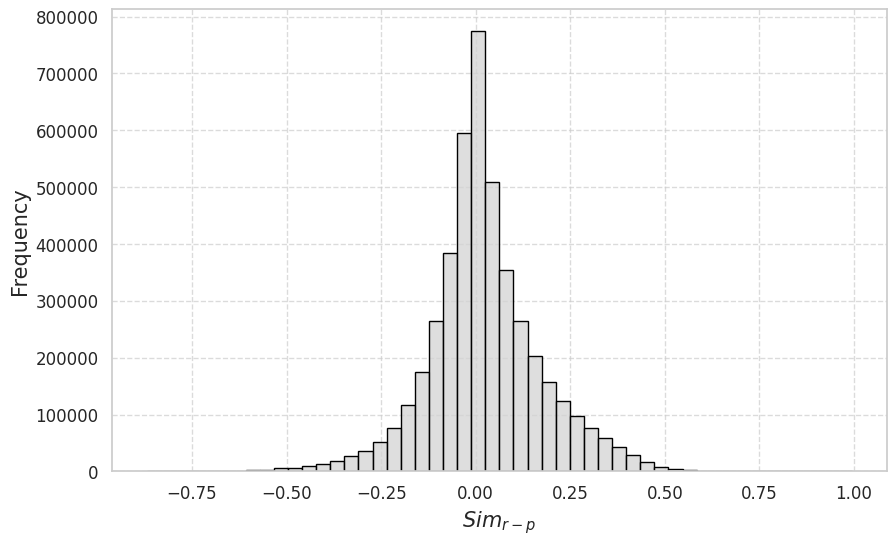

In [18]:
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.5)

plt.figure(figsize=(10, 6))
ax = sns.histplot(df_rq4['sim_rp'],bins=50,color='lightgray', edgecolor='black')

# plt.title('Distribution of $Sim_{r-p}$ Values', fontsize=20, weight='bold')
plt.xlabel('$Sim_{r-p}$', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
# ax.set_yscale('log')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.savefig('figures/RQ4_histogram_z_distribution.png', dpi=300, bbox_inches='tight')

plt.show()

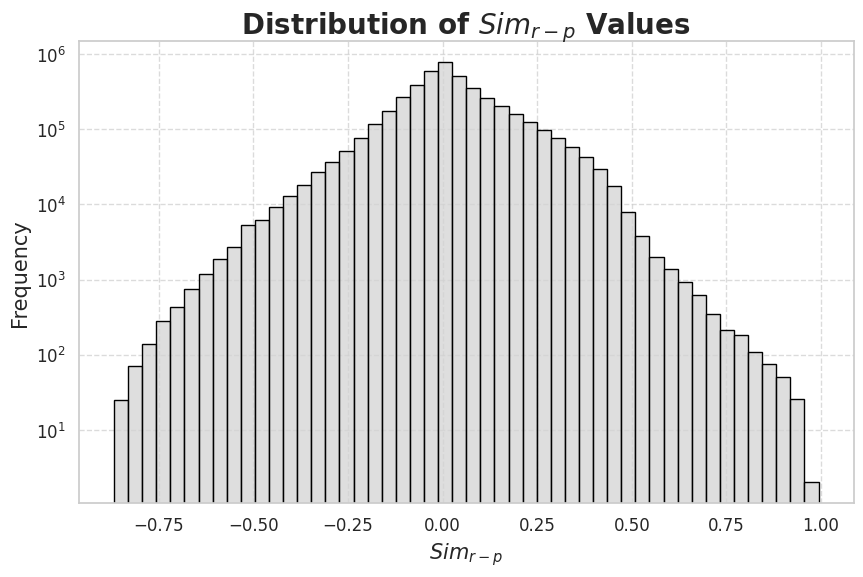

In [19]:
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.5)

plt.figure(figsize=(10, 6))
ax = sns.histplot(df_rq4['sim_rp'],bins=50,color='lightgray', edgecolor='black')

plt.title('Distribution of $Sim_{r-p}$ Values', fontsize=20, weight='bold')
plt.xlabel('$Sim_{r-p}$', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
ax.set_yscale('log')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

# plt.savefig('figures/RQ4_histogram_z_distribution.png', dpi=300, bbox_inches='tight')

plt.show()

In [20]:
df_rq4[df_rq4['sim_rp']==-0.5]

,chunk_id,candidate_id,v1_gestalt_sim,v2_gestalt_sim,solution_gestalt_sim,aggregate_mean_gestalt,aggregate_harmonic_mean_gestalt,aggregate_min_gestalt,aggregate_max_gestalt,sim_rp,...,url,project,project_user,project_name,path,file_name,sha,leftsha,rightsha,basesha
5704,780621,83,1.0,0.0,0.0,0.5,0.0,0.0,1.0,-0.5,...,https://github.com/Ramblurr/Anki-Android,Ramblurr/Anki-Android,Ramblurr,Anki-Android,Ramblurr/Anki-Android/src/com/ichi2/anki/Ankid...,Ankidroid.java,1f137bf9c6e4f47b93e669c6668df681b74543b9,08ce9ff1f9630580ec16a4f24779d1111bc91d6c,fb380337222eab9f5bc4254d031ef1ae4d8429ba,bf0e561f87193ad5e31c7fdd9595629b26dd4376
13744,1122520,0,1.0,0.0,0.0,0.5,0.0,0.0,1.0,-0.5,...,https://github.com/apache/accumulo,apache/accumulo,apache,accumulo,apache/accumulo/core/src/main/java/org/apache/...,ClientConfiguration.java,61b76b507356ec2d5650b011ec22bd550ccbbd56,b29bd921b7d91ec07fae20549a365fc6b7f11d0a,f5c7f05af7bdb95a2485bc0566bd2c4968f1427f,f0b3487bbe226714435643559eb898b5baa95a44
15208,1086962,2,1.0,0.0,0.0,0.5,0.0,0.0,1.0,-0.5,...,https://github.com/MCTCP/TerrainControl,MCTCP/TerrainControl,MCTCP,TerrainControl,MCTCP/TerrainControl/common/src/main/java/com/...,WorldSettings.java,2c4a428661a749c8e09f7c4b8da96a3d4588851e,40e42a02b522ba985ac97134e2fb3389eb7ed48e,7e322fe7e3acb9c05e1264c616dae11607aefd87,17054a5a83c27948611708bf324a7c547c5237f1
16227,1321498,21,0.0,1.0,0.0,0.5,0.0,0.0,1.0,-0.5,...,https://github.com/Atmosphere/nettosphere,Atmosphere/nettosphere,Atmosphere,nettosphere,Atmosphere/nettosphere/server/src/main/java/or...,Config.java,8b8d7102434514131c193b81b5cf3f554e056ce9,0f8322f85766b2394076826c38492207c06cbc2c,fb2594b09af483d3db967dbf8a460799b5a24fa4,8ed3ea60055b1427d2812e942768aae33f4b0392
20781,1009512,1,0.0,1.0,0.0,0.5,0.0,0.0,1.0,-0.5,...,https://github.com/wf4ever/rodl,wf4ever/rodl,wf4ever,rodl,wf4ever/rodl/src/main/java/pl/psnc/dl/wf4ever/...,CopyOperation.java,fd657f9392038b3479b3feb25a8d616d68284425,8289df86c4619f153d23879b3a89402b7c49ec3a,1779ee0bfc0437d2f6c7533aac48fbbdfee182a4,2c7c400e353178e606a46aedbf7e811a3275f4ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4491484,984683,0,0.0,1.0,0.0,0.5,0.0,0.0,1.0,-0.5,...,https://github.com/CloudStack-extras/CloudStac...,CloudStack-extras/CloudStack-archive,CloudStack-extras,CloudStack-archive,CloudStack-extras/CloudStack-archive/server/sr...,AgentManagerImpl.java,55f9f5e8c6d985752c62478067a11ed85f4ec277,8a3a1f2c3e74ccc68a545669a63eb180533090fa,0810831fd2e2fd4c3a5dcbd53eb6a9937feca6c7,402f275a9f0090cd88301d01f4184e96eb491402
4492296,1251226,1,1.0,0.0,0.0,0.5,0.0,0.0,1.0,-0.5,...,https://github.com/AOKP/packages_apps_Settings,AOKP/packages_apps_Settings,AOKP,packages_apps_Settings,AOKP/packages_apps_Settings/src/com/android/se...,ConfirmLockPassword.java,5de92cca6f79caa6ba48fe38a062099d63e5ae06,a2e7af911289c6110dba619cd2cd8433cbec2835,e63ac36f41eab0138fa4e85c1e7859dd2d8be17a,2f633ca3a5813eb3fece716448308bf8e7d351ee
4493305,932012,8,0.0,1.0,0.0,0.5,0.0,0.0,1.0,-0.5,...,https://github.com/apache/lucene-solr,apache/lucene-solr,apache,lucene-solr,apache/lucene-solr/lucene/replicator/src/test/...,TestNRTReplication.java,82ecccf8e9efbafd13c8a66362e8bebf5dca1c29,7af83c486b50ceb13d58e79dd65c158bc96130dc,d9f20f53edd9dc5895ad18e1844fb4ae9652189e,8889469b8bb1445133c39069adfdb5db028dbad1
4499411,1464308,5,1.0,0.0,0.0,0.5,0.0,0.0,1.0,-0.5,...,https://github.com/i2p/i2p.i2p,i2p/i2p.i2p,i2p,i2p.i2p,i2p/i2p.i2p/router/java/src/net/i2p/data/i2np/...,I2NPMessageImpl.java,5689fa85128d3b243d612c472a97d211ec7b8c0c,25e51a945cdf2bf9a9b7c5cdd679ecadc9a16771,bfd1306a566605c212e37bcb2237ce9ec5f3c177,5dda9154673b1b5546e31220f3f3ac940c3267d8


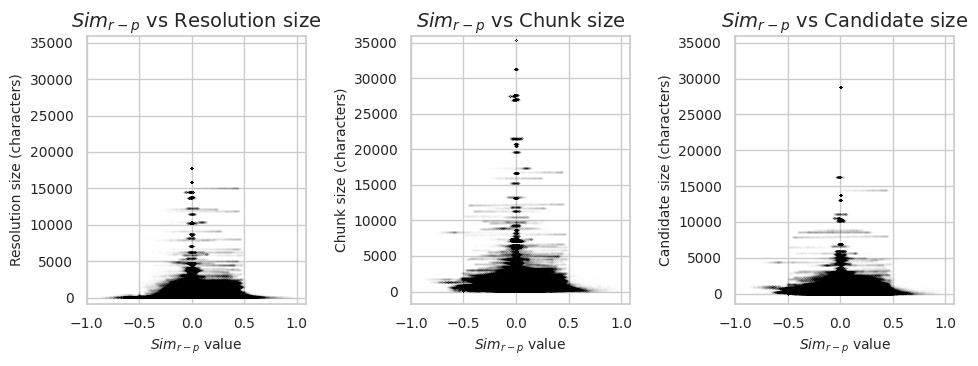

In [21]:
plt.close('all')

# fig, axs = plt.subplots(2, 2, figsize=(10, 6))
fig = plt.figure(figsize=(10, 4))
gs = fig.add_gridspec(1, 3)

# Define subplots
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])


# bins = [80,80]  # Adjust here for more or less granular

# h1 = ax1.hist2d(df_rq4['sim_rp'], df_rq4['solution_size_char'], bins=bins, cmap='Greys', density=True)
# ax1.set_title('Mean $Sim_{r-p}$ vs Resolution size', fontsize=14)
# ax1.set_xlabel('Mean $Sim_{r-p}$ value', fontsize=12)
# ax1.set_ylabel('Resolution size (characters)', fontsize=12)
# ax1.set_yscale('log')
# cbar1 = fig.colorbar(h1[3], ax=ax1)
# cbar1.set_label('Density', fontsize=12)

ax1.scatter(df_rq4['sim_rp'], df_rq4['solution_size_char'], color='black', alpha=0.025, marker='.', s=0.1)
ax1.set_title('$Sim_{r-p}$ vs Resolution size', fontsize=14)
ax1.set_xlabel('$Sim_{r-p}$ value', fontsize=10)
ax1.set_ylabel('Resolution size (characters)', fontsize=10)
ax1.set_xticks([-1, -0.5, 0, 0.5, 1])
ax1.tick_params(labelsize=10)
ax1.set_ylim(top=36000)
# ax1.set_yscale('log')

ax2.scatter(df_rq4['sim_rp'], df_rq4['chunk_size_char'], color='black', alpha=0.025, marker='.', s=0.1)
ax2.set_title('$Sim_{r-p}$ vs Chunk size', fontsize=14)
ax2.set_xlabel('$Sim_{r-p}$ value', fontsize=10)
ax2.set_ylabel('Chunk size (characters)', fontsize=10)
ax2.set_xticks([-1, -0.5, 0, 0.5, 1])
ax2.tick_params(labelsize=10)
ax2.set_ylim(top=36000)
# ax2.set_yscale('log')

ax3.scatter(df_rq4['sim_rp'], df_rq4['candidate_size_char'], color='black', alpha=0.025, marker='.', s=0.1)
ax3.set_title('$Sim_{r-p}$ vs Candidate size', fontsize=14)
ax3.set_xlabel('$Sim_{r-p}$ value', fontsize=10)
ax3.set_ylabel('Candidate size (characters)', fontsize=10)
ax3.set_xticks([-1, -0.5, 0, 0.5, 1])
ax3.tick_params(labelsize=10)
ax3.set_ylim(top=36000)
# ax3.set_yscale('log')

# Adjust layout
plt.tight_layout()

# Show the plot
# plt.suptitle('Scatter plot of candidate/resolution and candidate/parents similarity \n', y=1.02, fontsize=16)
plt.savefig('figures/RQ4_factors.png', dpi=300, bbox_inches='tight')
plt.show()

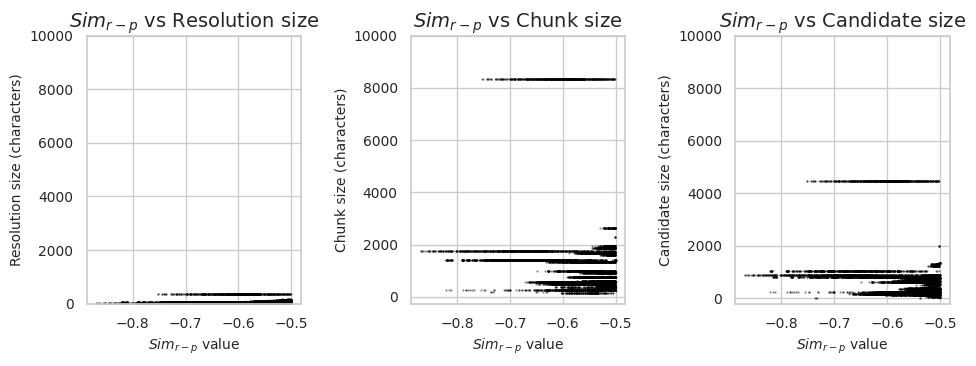

In [25]:
plt.close('all')

# fig, axs = plt.subplots(2, 2, figsize=(10, 6))
fig = plt.figure(figsize=(10, 4))
gs = fig.add_gridspec(1, 3)

# Define subplots
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])


# bins = [80,80]  # Adjust here for more or less granular

# h1 = ax1.hist2d(df_rq4['sim_rp'], df_rq4['solution_size_char'], bins=bins, cmap='Greys', density=True)
# ax1.set_title('Mean $Sim_{r-p}$ vs Resolution size', fontsize=14)
# ax1.set_xlabel('Mean $Sim_{r-p}$ value', fontsize=12)
# ax1.set_ylabel('Resolution size (characters)', fontsize=12)
# ax1.set_yscale('log')
# cbar1 = fig.colorbar(h1[3], ax=ax1)
# cbar1.set_label('Density', fontsize=12)
df_rq4_left_zoom = df_rq4[df_rq4['sim_rp'] < -0.5]


ax1.scatter(df_rq4_left_zoom['sim_rp'], df_rq4_left_zoom['solution_size_char'], color='black', alpha=0.5, marker='.', s=1)
ax1.set_title('$Sim_{r-p}$ vs Resolution size', fontsize=14)
ax1.set_xlabel('$Sim_{r-p}$ value', fontsize=10)
ax1.set_ylabel('Resolution size (characters)', fontsize=10)
# ax1.set_xticks([-1, -0.5, 0, 0.5, 1])
ax1.tick_params(labelsize=10)
ax1.set_ylim(top=10000)
# ax1.set_yscale('log')

ax2.scatter(df_rq4_left_zoom['sim_rp'], df_rq4_left_zoom['chunk_size_char'], color='black', alpha=0.5, marker='.', s=1)
ax2.set_title('$Sim_{r-p}$ vs Chunk size', fontsize=14)
ax2.set_xlabel('$Sim_{r-p}$ value', fontsize=10)
ax2.set_ylabel('Chunk size (characters)', fontsize=10)
# ax2.set_xticks([-1, -0.5, 0, 0.5, 1])
ax2.tick_params(labelsize=10)
ax2.set_ylim(top=10000)
# ax2.set_yscale('log')

ax3.scatter(df_rq4_left_zoom['sim_rp'], df_rq4_left_zoom['candidate_size_char'], color='black', alpha=0.5, marker='.', s=1)
ax3.set_title('$Sim_{r-p}$ vs Candidate size', fontsize=14)
ax3.set_xlabel('$Sim_{r-p}$ value', fontsize=10)
ax3.set_ylabel('Candidate size (characters)', fontsize=10)
# ax3.set_xticks([-1, -0.5, 0, 0.5, 1])
ax3.tick_params(labelsize=10)
ax3.set_ylim(top=10000)
# ax3.set_yscale('log')

# Adjust layout
plt.tight_layout()

# Show the plot
# plt.suptitle('Scatter plot of candidate/resolution and candidate/parents similarity \n', y=1.02, fontsize=16)
# plt.savefig('figures/RQ4_factors.png', dpi=300, bbox_inches='tight')
plt.show()

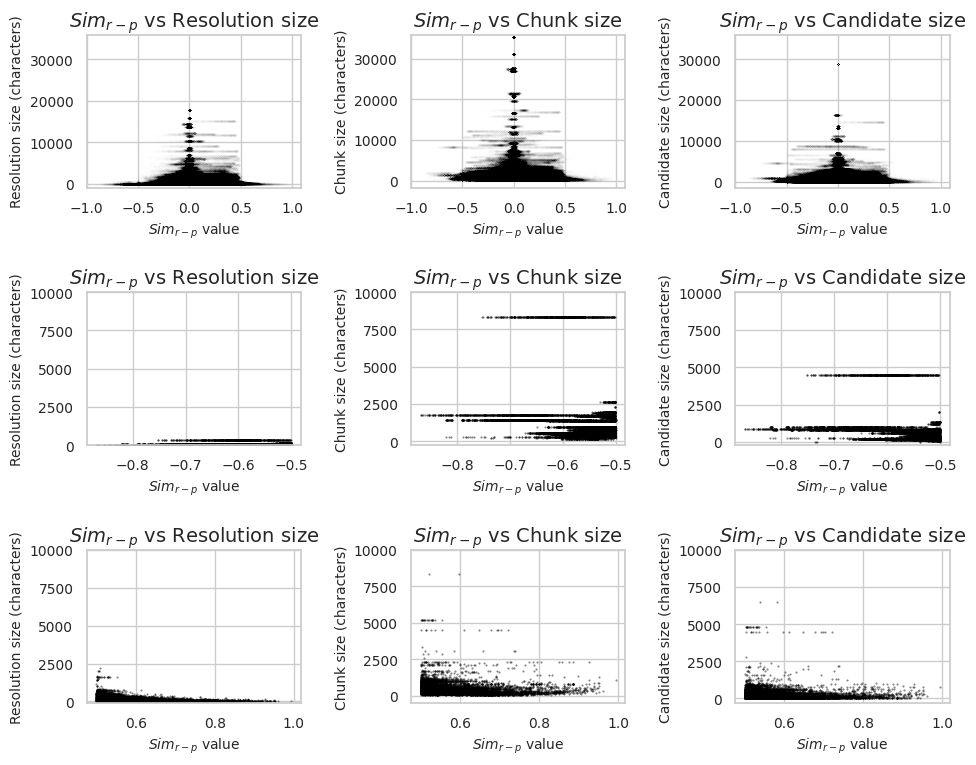

In [30]:
plt.close('all')

# fig, axs = plt.subplots(2, 2, figsize=(10, 6))
fig = plt.figure(figsize=(10, 8))
gs = fig.add_gridspec(3, 3)

# Define subplots
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])

ax4 = fig.add_subplot(gs[3])
ax5 = fig.add_subplot(gs[4])
ax6 = fig.add_subplot(gs[5])

ax7 = fig.add_subplot(gs[6])
ax8 = fig.add_subplot(gs[7])
ax9 = fig.add_subplot(gs[8])


ax1.scatter(df_rq4['sim_rp'], df_rq4['solution_size_char'], color='black', alpha=0.025, marker='.', s=0.1)
ax1.set_title('$Sim_{r-p}$ vs Resolution size', fontsize=14)
ax1.set_xlabel('$Sim_{r-p}$ value', fontsize=10)
ax1.set_ylabel('Resolution size (characters)', fontsize=10)
ax1.set_xticks([-1, -0.5, 0, 0.5, 1])
ax1.tick_params(labelsize=10)
ax1.set_ylim(top=36000)
# ax1.set_yscale('log')

ax2.scatter(df_rq4['sim_rp'], df_rq4['chunk_size_char'], color='black', alpha=0.025, marker='.', s=0.1)
ax2.set_title('$Sim_{r-p}$ vs Chunk size', fontsize=14)
ax2.set_xlabel('$Sim_{r-p}$ value', fontsize=10)
ax2.set_ylabel('Chunk size (characters)', fontsize=10)
ax2.set_xticks([-1, -0.5, 0, 0.5, 1])
ax2.tick_params(labelsize=10)
ax2.set_ylim(top=36000)
# ax2.set_yscale('log')

ax3.scatter(df_rq4['sim_rp'], df_rq4['candidate_size_char'], color='black', alpha=0.025, marker='.', s=0.1)
ax3.set_title('$Sim_{r-p}$ vs Candidate size', fontsize=14)
ax3.set_xlabel('$Sim_{r-p}$ value', fontsize=10)
ax3.set_ylabel('Candidate size (characters)', fontsize=10)
ax3.set_xticks([-1, -0.5, 0, 0.5, 1])
ax3.tick_params(labelsize=10)
ax3.set_ylim(top=36000)



df_rq4_left_zoom = df_rq4[df_rq4['sim_rp'] < -0.5]


ax4.scatter(df_rq4_left_zoom['sim_rp'], df_rq4_left_zoom['solution_size_char'], color='black', alpha=0.5, marker='.', s=1)
ax4.set_title('$Sim_{r-p}$ vs Resolution size', fontsize=14)
ax4.set_xlabel('$Sim_{r-p}$ value', fontsize=10)
ax4.set_ylabel('Resolution size (characters)', fontsize=10)
# ax1.set_xticks([-1, -0.5, 0, 0.5, 1])
ax4.tick_params(labelsize=10)
ax4.set_ylim(top=10000)
# ax1.set_yscale('log')

ax5.scatter(df_rq4_left_zoom['sim_rp'], df_rq4_left_zoom['chunk_size_char'], color='black', alpha=0.5, marker='.', s=1)
ax5.set_title('$Sim_{r-p}$ vs Chunk size', fontsize=14)
ax5.set_xlabel('$Sim_{r-p}$ value', fontsize=10)
ax5.set_ylabel('Chunk size (characters)', fontsize=10)
# ax2.set_xticks([-1, -0.5, 0, 0.5, 1])
ax5.tick_params(labelsize=10)
ax5.set_ylim(top=10000)
# ax2.set_yscale('log')

ax6.scatter(df_rq4_left_zoom['sim_rp'], df_rq4_left_zoom['candidate_size_char'], color='black', alpha=0.5, marker='.', s=1)
ax6.set_title('$Sim_{r-p}$ vs Candidate size', fontsize=14)
ax6.set_xlabel('$Sim_{r-p}$ value', fontsize=10)
ax6.set_ylabel('Candidate size (characters)', fontsize=10)
# ax3.set_xticks([-1, -0.5, 0, 0.5, 1])
ax6.tick_params(labelsize=10)
ax6.set_ylim(top=10000)



df_rq4_right_zoom = df_rq4[df_rq4['sim_rp'] > 0.5]


ax7.scatter(df_rq4_right_zoom['sim_rp'], df_rq4_right_zoom['solution_size_char'], color='black', alpha=0.5, marker='.', s=1)
ax7.set_title('$Sim_{r-p}$ vs Resolution size', fontsize=14)
ax7.set_xlabel('$Sim_{r-p}$ value', fontsize=10)
ax7.set_ylabel('Resolution size (characters)', fontsize=10)
# ax1.set_xticks([-1, -0.5, 0, 0.5, 1])
ax7.tick_params(labelsize=10)
ax7.set_ylim(top=10000)
# ax1.set_yscale('log')

ax8.scatter(df_rq4_right_zoom['sim_rp'], df_rq4_right_zoom['chunk_size_char'], color='black', alpha=0.5, marker='.', s=1)
ax8.set_title('$Sim_{r-p}$ vs Chunk size', fontsize=14)
ax8.set_xlabel('$Sim_{r-p}$ value', fontsize=10)
ax8.set_ylabel('Chunk size (characters)', fontsize=10)
# ax2.set_xticks([-1, -0.5, 0, 0.5, 1])
ax8.tick_params(labelsize=10)
ax8.set_ylim(top=10000)
# ax2.set_yscale('log')

ax9.scatter(df_rq4_right_zoom['sim_rp'], df_rq4_right_zoom['candidate_size_char'], color='black', alpha=0.5, marker='.', s=1)
ax9.set_title('$Sim_{r-p}$ vs Candidate size', fontsize=14)
ax9.set_xlabel('$Sim_{r-p}$ value', fontsize=10)
ax9.set_ylabel('Candidate size (characters)', fontsize=10)
# ax3.set_xticks([-1, -0.5, 0, 0.5, 1])
ax9.tick_params(labelsize=10)
ax9.set_ylim(top=10000)
# ax3.set_yscale('log')

# Adjust layout
plt.tight_layout()

# Show the plot
# plt.suptitle('Scatter plot of candidate/resolution and candidate/parents similarity \n', y=1.02, fontsize=16)
# plt.savefig('figures/RQ4_factors.png', dpi=300, bbox_inches='tight')
plt.show()

In [22]:
df_rq4[df_rq4['sim_rp']<-0.5].describe()

,chunk_id,candidate_id,v1_gestalt_sim,v2_gestalt_sim,solution_gestalt_sim,aggregate_mean_gestalt,aggregate_harmonic_mean_gestalt,aggregate_min_gestalt,aggregate_max_gestalt,sim_rp,...,solution_size,candidate_size,chunk_size_char,solution_size_char,candidate_size_char,v1_size_char,v2_size_char,line_start,line_end,line_separator
count,1.113500e+04,11135.000000,11135.000000,11135.000000,11135.000000,11135.000000,11135.000000,11135.000000,11135.000000,11135.000000,...,11135.000000,11135.000000,11135.000000,11135.000000,11135.000000,11135.000000,11135.000000,11135.000000,11135.000000,11135.000000
mean,1.099414e+06,483.505613,0.704848,0.731678,0.141620,0.718263,0.681279,0.610085,0.826440,-0.576643,...,1.671217,15.139919,1417.591289,63.890705,780.345487,700.702110,716.889178,239.548181,271.763269,255.897800
std,1.758497e+05,292.529409,0.188594,0.159971,0.066736,0.086147,0.132358,0.176815,0.082750,0.067055,...,1.265938,19.076185,1825.336615,79.576234,982.316746,864.177282,1006.543159,322.998057,343.578548,335.168483
min,9.237970e+05,0.000000,0.039617,0.166076,0.017663,0.517663,0.076209,0.039617,0.568512,-0.868749,...,1.000000,0.000000,134.000000,6.000000,0.000000,29.000000,29.000000,9.000000,21.000000,15.000000
25%,9.614680e+05,226.500000,0.641008,0.660668,0.091918,0.648752,0.583369,0.459237,0.766520,-0.610796,...,1.000000,5.000000,556.000000,28.000000,213.000000,211.000000,253.000000,27.000000,41.000000,35.000000
50%,1.016097e+06,477.000000,0.757225,0.758091,0.133333,0.714883,0.704901,0.659062,0.828125,-0.557557,...,1.000000,9.000000,933.000000,41.000000,625.000000,323.000000,479.000000,83.000000,93.000000,88.000000
75%,1.302733e+06,738.000000,0.835408,0.844518,0.185714,0.781825,0.776025,0.744921,0.887443,-0.524970,...,2.000000,19.000000,1394.000000,67.000000,793.000000,702.000000,692.000000,299.000000,308.000000,303.000000
max,1.600078e+06,999.000000,1.000000,1.000000,0.432990,0.987201,0.987181,0.986515,1.000000,-0.500000,...,6.000000,85.000000,8324.000000,362.000000,4470.000000,3822.000000,4502.000000,2709.000000,2772.000000,2750.000000


In [23]:
df_rq4.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,chunk_id,candidate_id,v1_gestalt_sim,v2_gestalt_sim,solution_gestalt_sim,aggregate_mean_gestalt,aggregate_harmonic_mean_gestalt,aggregate_min_gestalt,aggregate_max_gestalt,sim_rp,...,solution_size,candidate_size,chunk_size_char,solution_size_char,candidate_size_char,v1_size_char,v2_size_char,line_start,line_end,line_separator
count,4509340.00000,4509340.00000,4509340.00000,4509340.00000,4509340.00000,4509340.00000,4509340.00000,4509340.00000,4509340.00000,4509340.00000,...,4509340.00000,4509340.00000,4509340.00000,4509340.00000,4509340.00000,4509340.00000,4509340.00000,4509340.00000,4509340.00000,4509340.00000
mean,1105045.98567,454.34936,0.60611,0.61003,0.63034,0.60807,0.55405,0.49075,0.72540,0.02226,...,13.20885,11.45673,960.86637,538.02712,483.27700,481.60786,479.25850,344.55668,369.97906,357.33089
std,212488.29944,295.79832,0.22436,0.22236,0.18561,0.15511,0.21856,0.21907,0.15578,0.14889,...,29.50678,29.28332,1723.53399,978.41892,949.36635,943.45018,951.41087,769.13606,771.46732,770.07055
min,776662.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.86875,...,1.00000,0.00000,26.00000,6.00000,0.00000,0.00000,0.00000,0.00000,7.00000,3.00000
25%,960569.00000,189.00000,0.49132,0.49670,0.52632,0.53154,0.46798,0.36800,0.65943,-0.05432,...,4.00000,3.00000,387.00000,192.00000,140.00000,144.00000,152.00000,45.00000,62.00000,54.00000
50%,1069706.00000,436.00000,0.65448,0.65759,0.66478,0.64065,0.61606,0.53901,0.74839,0.00899,...,7.00000,6.00000,582.00000,316.00000,281.00000,263.00000,273.00000,119.00000,144.00000,131.00000
75%,1293352.00000,707.00000,0.76401,0.76633,0.76271,0.71071,0.70016,0.65347,0.82784,0.09508,...,12.00000,11.00000,962.00000,549.00000,520.00000,486.00000,490.00000,328.00000,360.00000,343.00000
max,1658666.00000,999.00000,1.00000,1.00000,1.00000,0.99560,0.99560,0.99454,1.00000,0.99374,...,781.00000,1187.00000,35437.00000,17828.00000,28864.00000,17687.00000,17750.00000,12359.00000,12366.00000,12362.00000


In [24]:
df_rq4[(df_rq4['sim_rp']>0.5)].describe()

,chunk_id,candidate_id,v1_gestalt_sim,v2_gestalt_sim,solution_gestalt_sim,aggregate_mean_gestalt,aggregate_harmonic_mean_gestalt,aggregate_min_gestalt,aggregate_max_gestalt,sim_rp,...,solution_size,candidate_size,chunk_size_char,solution_size_char,candidate_size_char,v1_size_char,v2_size_char,line_start,line_end,line_separator
count,1.124600e+04,11246.000000,11246.000000,11246.000000,11246.000000,11246.000000,11246.000000,11246.000000,11246.000000,11246.000000,...,11246.000000,11246.000000,11246.000000,11246.000000,11246.000000,11246.000000,11246.000000,11246.000000,11246.000000,11246.000000
mean,1.125718e+06,342.201049,0.317074,0.246820,0.860892,0.281947,0.016868,0.012552,0.551342,0.578945,...,5.215543,6.275742,451.699182,174.899876,237.251112,227.871243,223.827939,238.198115,253.020363,245.859506
std,2.018932e+05,304.458950,0.316873,0.293052,0.105779,0.102981,0.068491,0.054904,0.201448,0.080203,...,3.804861,7.540564,435.140037,156.222447,345.885220,304.383189,434.070062,402.105226,403.720388,403.187575
min,7.769730e+05,0.000000,0.000000,0.000000,0.525714,0.006256,0.000000,0.000000,0.012511,0.500000,...,1.000000,0.000000,37.000000,6.000000,0.000000,0.000000,0.000000,1.000000,7.000000,3.000000
25%,9.761180e+05,60.000000,0.000000,0.000000,0.783333,0.209573,0.000000,0.000000,0.408657,0.519594,...,3.000000,2.000000,239.000000,80.000000,57.000000,0.000000,0.000000,40.000000,54.000000,46.000000
50%,1.099965e+06,257.000000,0.298474,0.021847,0.873816,0.289731,0.000000,0.000000,0.563218,0.551641,...,5.000000,5.000000,333.000000,129.000000,172.000000,150.000000,1.000000,112.000000,125.000000,119.000000
75%,1.308120e+06,581.750000,0.621469,0.494624,0.954181,0.356732,0.000000,0.000000,0.699495,0.613516,...,7.000000,8.000000,556.750000,232.000000,304.000000,367.000000,318.000000,243.000000,263.000000,253.000000
max,1.652304e+06,999.000000,0.989041,0.997892,1.000000,0.498946,0.494197,0.473896,0.997892,0.993744,...,51.000000,165.000000,10675.000000,2185.000000,6486.000000,3822.000000,10675.000000,8079.000000,8085.000000,8080.000000


/tmp/ipykernel_4955/653798914.py:18: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x,y,


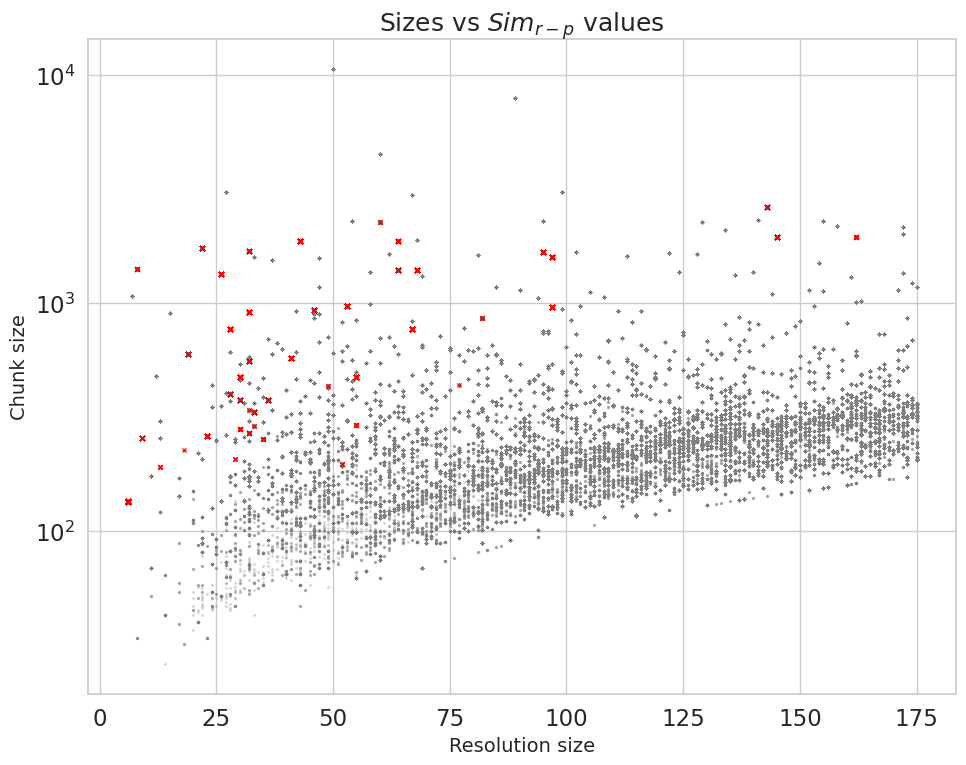

In [25]:
import matplotlib as mpl
plt.figure(figsize=(10, 8))
df_rq4_zoom = df_rq4[df_rq4['solution_size_char']<= 175]
# df_rq4_zoom = df_rq4
smallest = df_rq4_zoom[df_rq4_zoom['sim_rp']<-0.5]
remaining = df_rq4_zoom[df_rq4_zoom['sim_rp']>=-0.5]
# df_rq4_zoom = df_rq4[df_rq4['solution_size']< 100]
x = remaining['solution_size_char']
y = remaining['chunk_size_char']
# z = df_rq4_zoom['z']
# fig = plt.figure(figsize=(6, 6))
plt.scatter(x,y,
           linewidths=1, alpha=.1,
            c='gray',
           s = 2)
x = smallest['solution_size_char']
y = smallest['chunk_size_char']
plt.scatter(x,y,
           linewidths=1, alpha=.7,
           edgecolor='k', c='red', marker='x',
           s = 10)
plt.title('Sizes vs $Sim_{r-p}$ values', fontsize=18)
# plt.colorbar(label='z', cmap='seismic')
plt.xlabel('Resolution size', fontsize=14)
plt.ylabel('Chunk size', fontsize=14)
plt.yscale('log')
plt.tight_layout()

# Show the plot
# plt.suptitle('Scatter plot of candidate/resolution and candidate/parents similarity \n', y=1.02, fontsize=16)
# plt.savefig('RQ4_quantitative_scatter_char.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipykernel_4955/1401915348.py:16: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[0,0].scatter(x,y,
/tmp/ipykernel_4955/1401915348.py:40: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[0,1].scatter(x,y,
/tmp/ipykernel_4955/1401915348.py:62: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[1,0].scatter(x,y,
/tmp/ipykernel_4955/1401915348.py:84: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[1,1].scatter(x

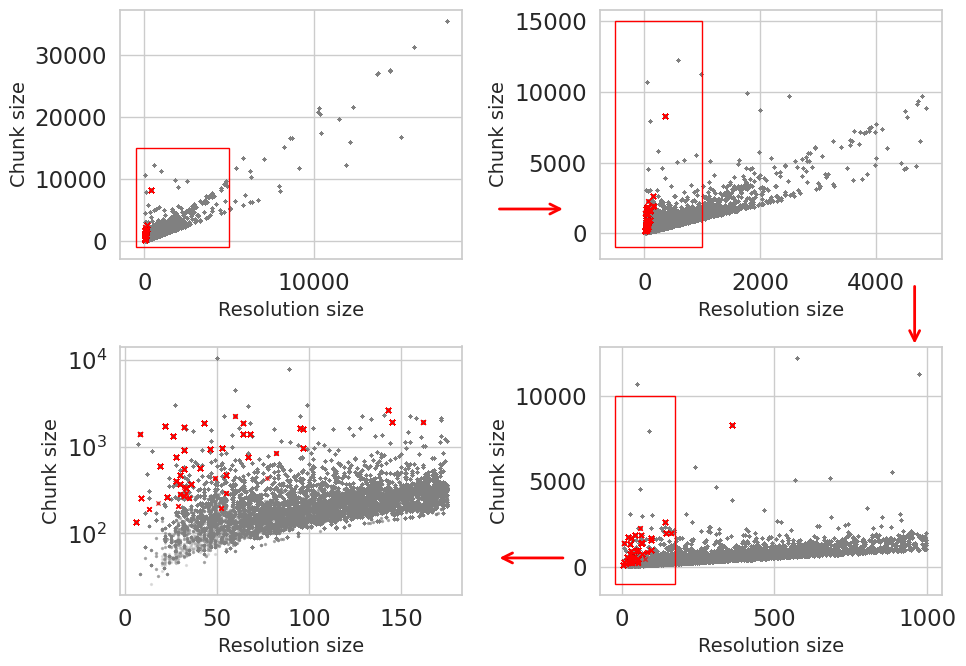

In [26]:
from matplotlib.patches import Rectangle

fig, axs = plt.subplots(2, 2, figsize=(10, 7))

df_rq4_zoom = df_rq4
smallest = df_rq4[df_rq4['sim_rp']<-0.5]
remaining = df_rq4[df_rq4['sim_rp']>=-0.5]
x = remaining['solution_size_char']
y = remaining['chunk_size_char']
axs[0,0].scatter(x,y,
           linewidths=1, alpha=.1,
            c='gray',
           s = 2)
x = smallest['solution_size_char']
y = smallest['chunk_size_char']
axs[0,0].scatter(x,y,
           linewidths=1, alpha=.7,
           edgecolor='k', c='red', marker='x',
           s = 10)
axs[0,0].set_xlabel('Resolution size', fontsize=14)
axs[0,0].set_ylabel('Chunk size', fontsize=14)

axs[0,0].add_patch(Rectangle((-500, -1000), 5500, 16000, facecolor="none", ec='red', lw=1))

arrowprops = dict(arrowstyle="->", linewidth=2, color='red')
arrow1_1 = plt.annotate('', xy=(-0.1,0.2), xycoords=axs[0,1].transAxes, xytext=(1.1,0.2), textcoords=axs[0,0].transAxes, arrowprops=arrowprops)
arrow1_1.set_in_layout(False)

df_rq4_zoom = df_rq4[df_rq4['solution_size_char']<= 5000]
smallest = df_rq4_zoom[df_rq4_zoom['sim_rp']<-0.5]
remaining = df_rq4_zoom[df_rq4_zoom['sim_rp']>=-0.5]
x = remaining['solution_size_char']
y = remaining['chunk_size_char']
axs[0,1].scatter(x,y,
           linewidths=1, alpha=.1,
            c='gray',
           s = 2)
x = smallest['solution_size_char']
y = smallest['chunk_size_char']
axs[0,1].scatter(x,y,
           linewidths=1, alpha=.7,
           edgecolor='k', c='red', marker='x',
           s = 10)
axs[0,1].set_xlabel('Resolution size', fontsize=14)
axs[0,1].set_ylabel('Chunk size', fontsize=14)
axs[0,1].add_patch(Rectangle((-500, -1000), 1500, 16000, facecolor="none", ec='red', lw=1))

arrow1_2 = plt.annotate('', xy=(0.92,1), xycoords=axs[1,1].transAxes, xytext=(0.92,-0.1), textcoords=axs[0,1].transAxes, arrowprops=arrowprops)
arrow1_2.set_in_layout(False)

df_rq4_zoom = df_rq4[df_rq4['solution_size_char']<= 175]
smallest = df_rq4_zoom[df_rq4_zoom['sim_rp']<-0.5]
remaining = df_rq4_zoom[df_rq4_zoom['sim_rp']>=-0.5]
x = remaining['solution_size_char']
y = remaining['chunk_size_char']
axs[1,0].scatter(x,y,
           linewidths=1, alpha=.1,
            c='gray',
           s = 2)
x = smallest['solution_size_char']
y = smallest['chunk_size_char']
axs[1,0].scatter(x,y,
           linewidths=1, alpha=.7,
           edgecolor='k', c='red', marker='x',
           s = 10)
axs[1,0].set_xlabel('Resolution size', fontsize=14)
axs[1,0].set_ylabel('Chunk size', fontsize=14)
axs[1,0].set_yscale('log')

arrow1_3 = plt.annotate('', xy=(1.1,0.15), xycoords=axs[1,0].transAxes, xytext=(-0.1,0.15), textcoords=axs[1,1].transAxes, arrowprops=arrowprops)
arrow1_3.set_in_layout(False)

df_rq4_zoom = df_rq4[df_rq4['solution_size_char']<= 1000]
smallest = df_rq4_zoom[df_rq4_zoom['sim_rp']<-0.5]
remaining = df_rq4_zoom[df_rq4_zoom['sim_rp']>=-0.5]
x = remaining['solution_size_char']
y = remaining['chunk_size_char']
axs[1,1].scatter(x,y,
           linewidths=1, alpha=.1,
            c='gray',
           s = 2)
x = smallest['solution_size_char']
y = smallest['chunk_size_char']
axs[1,1].scatter(x,y,
           linewidths=1, alpha=.7,
           edgecolor='k', c='red', marker='x',
           s = 10)
axs[1,1].set_xlabel('Resolution size', fontsize=14)
axs[1,1].set_ylabel('Chunk size', fontsize=14)
axs[1,1].add_patch(Rectangle((-20, -1000), 195, 11000, facecolor="none", ec='red', lw=1))



# fig.suptitle('Chunk and Resolution sizes (char) vs $z < 0.5$', fontsize=12)
plt.tight_layout()
plt.savefig('figures/RQ4_quantitative_scatter_char_small_sim_rp.png', dpi=300, bbox_inches='tight')
plt.show()

In [27]:
smallest = df_rq4[df_rq4['sim_rp']<-0.5]

In [28]:
smallest

,chunk_id,candidate_id,v1_gestalt_sim,v2_gestalt_sim,solution_gestalt_sim,aggregate_mean_gestalt,aggregate_harmonic_mean_gestalt,aggregate_min_gestalt,aggregate_max_gestalt,sim_rp,...,url,project,project_user,project_name,path,file_name,sha,leftsha,rightsha,basesha
118565,1116526,3,0.350181,0.871369,0.081023,0.610775,0.499589,0.350181,0.871369,-0.529751,...,https://github.com/digipost/digipost-api-clien...,digipost/digipost-api-client-java,digipost,digipost-api-client-java,digipost/digipost-api-client-java/src/test/jav...,XsdValidationTest.java,85e1e684ce03b4dd708846a8011f5aaac63aff73,c12e847b926ce549c4cedbef8f5904bca10d1544,53ea5c7e1294630f80f06a02c0a870448302ff2f,3f35049cc43a6e7661142449326597c90dd66e60
118566,1116526,4,0.303120,0.897507,0.068027,0.600314,0.453184,0.303120,0.897507,-0.532286,...,https://github.com/digipost/digipost-api-clien...,digipost/digipost-api-client-java,digipost,digipost-api-client-java,digipost/digipost-api-client-java/src/test/jav...,XsdValidationTest.java,85e1e684ce03b4dd708846a8011f5aaac63aff73,c12e847b926ce549c4cedbef8f5904bca10d1544,53ea5c7e1294630f80f06a02c0a870448302ff2f,3f35049cc43a6e7661142449326597c90dd66e60
118569,1116526,7,0.291429,0.926126,0.065041,0.608777,0.443347,0.291429,0.926126,-0.543737,...,https://github.com/digipost/digipost-api-clien...,digipost/digipost-api-client-java,digipost,digipost-api-client-java,digipost/digipost-api-client-java/src/test/jav...,XsdValidationTest.java,85e1e684ce03b4dd708846a8011f5aaac63aff73,c12e847b926ce549c4cedbef8f5904bca10d1544,53ea5c7e1294630f80f06a02c0a870448302ff2f,3f35049cc43a6e7661142449326597c90dd66e60
118572,1116526,10,0.333333,0.862288,0.084633,0.597811,0.480803,0.333333,0.862288,-0.513178,...,https://github.com/digipost/digipost-api-clien...,digipost/digipost-api-client-java,digipost,digipost-api-client-java,digipost/digipost-api-client-java/src/test/jav...,XsdValidationTest.java,85e1e684ce03b4dd708846a8011f5aaac63aff73,c12e847b926ce549c4cedbef8f5904bca10d1544,53ea5c7e1294630f80f06a02c0a870448302ff2f,3f35049cc43a6e7661142449326597c90dd66e60
118575,1116526,13,0.354730,0.826347,0.078895,0.590539,0.496377,0.354730,0.826347,-0.511643,...,https://github.com/digipost/digipost-api-clien...,digipost/digipost-api-client-java,digipost,digipost-api-client-java,digipost/digipost-api-client-java/src/test/jav...,XsdValidationTest.java,85e1e684ce03b4dd708846a8011f5aaac63aff73,c12e847b926ce549c4cedbef8f5904bca10d1544,53ea5c7e1294630f80f06a02c0a870448302ff2f,3f35049cc43a6e7661142449326597c90dd66e60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147363,963926,835,0.156087,0.999412,0.071307,0.577750,0.270006,0.156087,0.999412,-0.506443,...,https://github.com/rhuss/jolokia,rhuss/jolokia,rhuss,jolokia,rhuss/jolokia/agent/jvm/src/main/java/org/jolo...,JolokiaHttpHandler.java,94e131ae7ec9f994a86cd3785bf826e8112bfb5d,27ce69adbbf3c7746b627e0fedacd853453616a7,c74de66b76e6840b0b3a8ca2e19fa1884e52939a,cf008b03a8de591ef366d66c9ff0b2b611743af6
4147368,963926,840,0.160202,0.981252,0.068852,0.570727,0.275435,0.160202,0.981252,-0.501874,...,https://github.com/rhuss/jolokia,rhuss/jolokia,rhuss,jolokia,rhuss/jolokia/agent/jvm/src/main/java/org/jolo...,JolokiaHttpHandler.java,94e131ae7ec9f994a86cd3785bf826e8112bfb5d,27ce69adbbf3c7746b627e0fedacd853453616a7,c74de66b76e6840b0b3a8ca2e19fa1884e52939a,cf008b03a8de591ef366d66c9ff0b2b611743af6
4147382,963926,854,0.205511,0.939001,0.065458,0.572256,0.337219,0.205511,0.939001,-0.506798,...,https://github.com/rhuss/jolokia,rhuss/jolokia,rhuss,jolokia,rhuss/jolokia/agent/jvm/src/main/java/org/jolo...,JolokiaHttpHandler.java,94e131ae7ec9f994a86cd3785bf826e8112bfb5d,27ce69adbbf3c7746b627e0fedacd853453616a7,c74de66b76e6840b0b3a8ca2e19fa1884e52939a,cf008b03a8de591ef366d66c9ff0b2b611743af6
4147452,963926,924,0.156169,0.999706,0.071348,0.577937,0.270138,0.156169,0.999706,-0.506590,...,https://github.com/rhuss/jolokia,rhuss/jolokia,rhuss,jolokia,rhuss/jolokia/agent/jvm/src/main/java/org/jolo...,Jolokia

In [29]:
smallest[['chunk_size', 'chunk_size_char', 'solution_size', 'solution_size_char']].describe()

,chunk_size,chunk_size_char,solution_size,solution_size_char
count,11135.000000,11135.000000,11135.000000,11135.000000
mean,30.214728,1417.591289,1.671217,63.890705
std,40.390646,1825.336615,1.265938,79.576234
min,3.000000,134.000000,1.000000,6.000000
25%,8.000000,556.000000,1.000000,28.000000
50%,16.000000,933.000000,1.000000,41.000000
75%,36.000000,1394.000000,2.000000,67.000000
max,180.000000,8324.000000,6.000000,362.000000


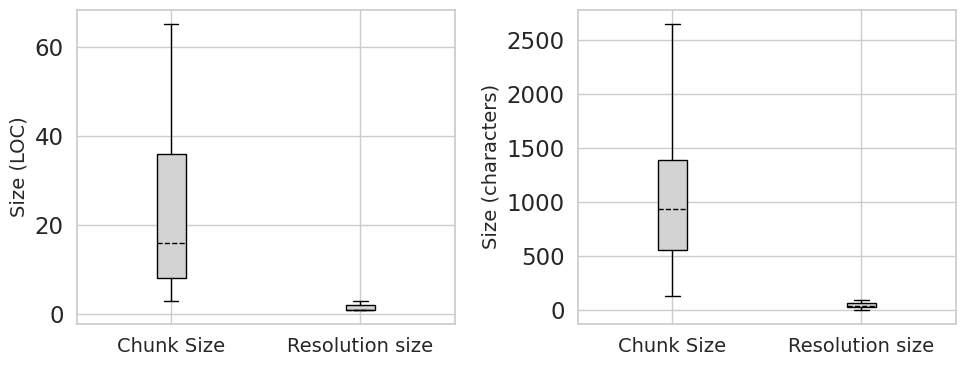

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].boxplot([smallest['chunk_size'], smallest['solution_size']], 
            patch_artist=True,  # To fill the box with color
#             widths=0.5,  # Width of the box
            medianprops=dict(color='black', linestyle='--'),  # Color of the median line
            boxprops=dict(facecolor='lightgray', color='black'),  # Color of the box
            whiskerprops=dict(color='black'),  # Color of the whiskers
            capprops=dict(color='black'),  # Color of the caps
            showfliers=False)  
axs[0].set_ylabel('Size (LOC)', fontsize=14)
axs[0].set_xticks([1, 2], ['Chunk Size', 'Resolution size'], fontsize=14)


axs[1].boxplot([smallest['chunk_size_char'], smallest['solution_size_char']], 
            patch_artist=True,  # To fill the box with color
#             widths=0.5,  # Width of the box
            medianprops=dict(color='black', linestyle='--'),  # Color of the median line
            boxprops=dict(facecolor='lightgray', color='black'),  # Color of the box
            whiskerprops=dict(color='black'),  # Color of the whiskers
            capprops=dict(color='black'),  # Color of the caps
            showfliers=False)  
axs[1].set_ylabel('Size (characters)', fontsize=14)
axs[1].set_xticks([1, 2], ['Chunk Size', 'Resolution size'], fontsize=14)
plt.tight_layout()



# plt.savefig('figures/RQ2_correlation_distribution.png', dpi=300)
plt.show()

## Qualitative analysis

#### $Sim_{r-p}$ close to -1 (more similar to parents than to resolution)

In [31]:
df_details = pd.read_csv("data/dataset_details.csv")

In [32]:
df_rq4

,chunk_id,candidate_id,v1_gestalt_sim,v2_gestalt_sim,solution_gestalt_sim,aggregate_mean_gestalt,aggregate_harmonic_mean_gestalt,aggregate_min_gestalt,aggregate_max_gestalt,sim_rp,...,url,project,project_user,project_name,path,file_name,sha,leftsha,rightsha,basesha
0,964152,0,0.410959,0.718954,0.568266,0.564957,0.522979,0.410959,0.718954,0.003309,...,https://github.com/rhuss/jolokia,rhuss/jolokia,rhuss,jolokia,rhuss/jolokia/agent/core/src/main/java/org/jol...,AgentServlet.java,0c02036309fbee50de060b3275fcea8e9bb5caf6,e03f14c051016e88c1db74a9aef4210468468e30,06eae85dd6785f377f1962d427590eb1347b92a4,a9f23f9ae3ce3917dc391efdef8cb94b0bd74560
1,964152,1,0.331288,0.817337,0.680556,0.574313,0.471475,0.331288,0.817337,0.106243,...,https://github.com/rhuss/jolokia,rhuss/jolokia,rhuss,jolokia,rhuss/jolokia/agent/core/src/main/java/org/jol...,AgentServlet.java,0c02036309fbee50de060b3275fcea8e9bb5caf6,e03f14c051016e88c1db74a9aef4210468468e30,06eae85dd6785f377f1962d427590eb1347b92a4,a9f23f9ae3ce3917dc391efdef8cb94b0bd74560
2,964152,2,0.983607,0.244344,0.290323,0.613975,0.391446,0.244344,0.983607,-0.323653,...,https://github.com/rhuss/jolokia,rhuss/jolokia,rhuss,jolokia,rhuss/jolokia/agent/core/src/main/java/org/jol...,AgentServlet.java,0c02036309fbee50de060b3275fcea8e9bb5caf6,e03f14c051016e88c1db74a9aef4210468468e30,06eae85dd6785f377f1962d427590eb1347b92a4,a9f23f9ae3ce3917dc391efdef8cb94b0bd74560
3,964152,3,0.289017,0.852853,0.758389,0.570935,0.431729,0.289017,0.852853,0.187454,...,https://github.com/rhuss/jolokia,rhuss/jolokia,rhuss,jolokia,rhuss/jolokia/agent/core/src/main/java/org/jol...,AgentServlet.java,0c02036309fbee50de060b3275fcea8e9bb5caf6,e03f14c051016e88c1db74a9aef4210468468e30,06eae85dd6785f377f1962d427590eb1347b92a4,a9f23f9ae3ce3917dc391efdef8cb94b0bd74560
4,964152,4,0.550459,0.490706,0.564103,0.520583,0.518868,0.490706,0.550459,0.043520,...,https://github.com/rhuss/jolokia,rhuss/jolokia,rhuss,jolokia,rhuss/jolokia/agent/core/src/main/java/org/jol...,AgentServlet.java,0c02036309fbee50de060b3275fcea8e9bb5caf6,e03f14c051016e88c1db74a9aef4210468468e30,06eae85dd6785f377f1962d427590eb1347b92a4,a9f23f9ae3ce3917dc391efdef8cb94b0bd74560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4509335,1392173,2,0.905923,0.996540,0.960000,0.951232,0.949073,0.905923,0.996540,0.008768,...,https://github.com/wala/WALA,wala/WALA,wala,WALA,wala/WALA/com.ibm.wala.core/src/com/ibm/wala/c...,JavaLanguage.java,cdaaddf88b9ab1dda6b5bf859b38bca6055b057b,c2909efdbeafa54b1528dac5f8ff084feb14ec97,b984760100e3be325d458f61b0d556f479701c95,10172606bb4c7643351d27e7bdc25f80b37e8be9
4509336,1392173,3,0.956522,0.870432,0.910256,0.913477,0.911448,0.870432,0.956522,-0.003220,...,https://github.com/wala/WALA,wala/WALA,wala,WALA,wala/WALA/com.ibm.wala.core/src/com/ibm/wala/c...,JavaLanguage.java,cdaaddf88b9ab1dda6b5bf859b38bca6055b057b,c2909efdbeafa54b1528dac5f8ff084feb14ec97,b984760100e3be325d458f61b0d556f479701c95,10172606bb4c7643351d27e7bdc25f80b37e8be9
4509337,1392173,4,0.949833,0.956811,1.000000,0.953322,0.953309,0.949833,0.956811,0.046678,...,https://github.com/wala/WALA,wala/WALA,wala,WALA,wala/WALA/com.ibm.wala.core/src/com/ibm/wala/c...,JavaLanguage.java,cdaaddf88b9ab1dda6b5bf859b38bca6055b057b,c2909efdbeafa54b1528dac5f8ff084feb14ec97,b984760100e3be325d458f61b0d556f479701c95,10172606bb4c7643351d27e7bdc25f80b37e8be9
4509338,1392173,5,0.665116,0.666667,0.650113,0.665891,0.665891,0.665116,0.666667,-0.015779,...,https://github.com/wala/WALA,wala/WALA,wala,WALA,wala/WALA/com.ibm.wala.core/src/com/ibm/wala/c...,JavaLanguage.java,cdaaddf88b9ab1dda6b5bf859b38bca6055b057b,c2909efdbeafa54b1528dac5f8ff084feb14ec97,b984760100e3be325d458f61b0d556f479701c95,10172606bb4c7643351d27e7bdc25f80b37e8be9


In [33]:
df_rq4_ordered = df_rq4.sort_values('sim_rp')
df_rq4_ordered

,chunk_id,candidate_id,v1_gestalt_sim,v2_gestalt_sim,solution_gestalt_sim,aggregate_mean_gestalt,aggregate_harmonic_mean_gestalt,aggregate_min_gestalt,aggregate_max_gestalt,sim_rp,...,url,project,project_user,project_name,path,file_name,sha,leftsha,rightsha,basesha
2495108,985205,360,0.987975,0.833333,0.041905,0.910654,0.904089,0.833333,0.987975,-0.868749,...,https://github.com/CloudStack-extras/CloudStac...,CloudStack-extras/CloudStack-archive,CloudStack-extras,CloudStack-archive,CloudStack-extras/CloudStack-archive/server/sr...,SnapshotManagerImpl.java,2740ba6c40b6554e3e55688f84f226f600cbb13c,9e03518c94d67318f2afd01f0c2471d8e7667c11,cde98c9ba3b3be2e7de96c2b9016841ad4b27ab6,9228088ce371c22211fbc77683abe1ffae3e7590
2494869,985205,121,0.999524,0.822148,0.042831,0.910836,0.902200,0.822148,0.999524,-0.868006,...,https://github.com/CloudStack-extras/CloudStac...,CloudStack-extras/CloudStack-archive,CloudStack-extras,CloudStack-archive,CloudStack-extras/CloudStack-archive/server/sr...,SnapshotManagerImpl.java,2740ba6c40b6554e3e55688f84f226f600cbb13c,9e03518c94d67318f2afd01f0c2471d8e7667c11,cde98c9ba3b3be2e7de96c2b9016841ad4b27ab6,9228088ce371c22211fbc77683abe1ffae3e7590
2495058,985205,310,0.963036,0.856476,0.044000,0.909756,0.906636,0.856476,0.963036,-0.865756,...,https://github.com/CloudStack-extras/CloudStac...,CloudStack-extras/CloudStack-archive,CloudStack-extras,CloudStack-archive,CloudStack-extras/CloudStack-archive/server/sr...,SnapshotManagerImpl.java,2740ba6c40b6554e3e55688f84f226f600cbb13c,9e03518c94d67318f2afd01f0c2471d8e7667c11,cde98c9ba3b3be2e7de96c2b9016841ad4b27ab6,9228088ce371c22211fbc77683abe1ffae3e7590
2495231,985205,483,0.963547,0.855977,0.045954,0.909762,0.906582,0.855977,0.963547,-0.863808,...,https://github.com/CloudStack-extras/CloudStac...,CloudStack-extras/CloudStack-archive,CloudStack-extras,CloudStack-archive,CloudStack-extras/CloudStack-archive/server/sr...,SnapshotManagerImpl.java,2740ba6c40b6554e3e55688f84f226f600cbb13c,9e03518c94d67318f2afd01f0c2471d8e7667c11,cde98c9ba3b3be2e7de96c2b9016841ad4b27ab6,9228088ce371c22211fbc77683abe1ffae3e7590
2495260,985205,512,0.969551,0.836944,0.042308,0.903247,0.898380,0.836944,0.969551,-0.860940,...,https://github.com/CloudStack-extras/CloudStac...,CloudStack-extras/CloudStack-archive,CloudStack-extras,CloudStack-archive,CloudStack-extras/CloudStack-archive/server/sr...,SnapshotManagerImpl.java,2740ba6c40b6554e3e55688f84f226f600cbb13c,9e03518c94d67318f2afd01f0c2471d8e7667c11,cde98c9ba3b3be2e7de96c2b9016841ad4b27ab6,9228088ce371c22211fbc77683abe1ffae3e7590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4452855,985751,819,0.000000,0.097240,1.000000,0.048620,0.000000,0.000000,0.097240,0.951380,...,https://github.com/jenkinsci/dimensionsscm-plugin,jenkinsci/dimensionsscm-plugin,jenkinsci,dimensionsscm-plugin,jenkinsci/dimensionsscm-plugin/src/main/java/h...,DimensionsAPI.java,88c5caff76515b9a259053576cd4b31e5db9a6b8,05dad459006391296dae73351d1702037c3f934a,43e8fd081e50cc07f4e73a5930f4abb9dbd1f374,c002d0a453df649e3b01ee7a44029ca638f03b46
838329,934600,160,0.000000,0.095933,1.000000,0.047967,0.000000,0.000000,0.095933,0.952033,...,https://github.com/Graylog2/graylog2-server,Graylog2/graylog2-server,Graylog2,graylog2-server,Graylog2/graylog2-server/graylog2-radio/src/ma...,Main.java,d8c6bff596e1f9c9194c4c02394407a45bc9831b,08beee58a30c62ceeddb3a8063da55033b011c29,4032dbef42e8a2c47118fa5d183b11b944775400,4090c1e52b2ea4b93370a1a0281cd1131c82bc60
685830,776973,3,0.093863,0.000000,1.000000,0.046931,0.000000,0.000000,0.093863,0.953069,...,https://github.com/apache/abdera,apache/abdera,apache,abdera,apache/abdera/parser/src/main/java/org/apache/...,FOMBuilder.java,7dd24076097885631a5e3a236230aa7db9df82ea,c4dda9aee32907da286d99b5ca91bc888f42a11c,2d43077dc168f6c6760a1a2b72d2100c531b99cb,05a7d3565708742ccd0afd53633f39d49a98c560
3528863,978781,21,0.078550,0.000000,1.000000,0.039275,0.000000,0.000000,0.078550,0.960725,...,https://github.com/sk8

In [34]:
# what is the proportion between the resolution size and the candidate size?
# df_rq4_ordered['res_cand_ratio'] = (df_rq4_ordered['solution_size_char']/df_rq4_ordered['candidate_size_char'])*100
df_rq4_ordered['res_cand_ratio'] = df_rq4_ordered.apply(
    lambda row: (row['solution_size_char'] / row['candidate_size_char']) * 100 
    if row['candidate_size_char'] != 0 else 0,
    axis=1
)

In [35]:
df_rq4_ordered[['chunk_id', 'sim_rp', 'candidate_id', 'chunk_size', 'chunk_size_char', 'candidate_size_char', 'solution_size_char', 'v1_size', 'v2_size', 'res_cand_ratio']].head(1000).to_csv('rq4_top_smallest.csv')

In [36]:
df_rq4_ordered[['chunk_id', 'sim_rp', 'candidate_id', 'chunk_size', 'chunk_size_char', 'candidate_size_char', 'solution_size_char', 'v1_size', 'v2_size']].head(50)

,chunk_id,sim_rp,candidate_id,chunk_size,chunk_size_char,candidate_size_char,solution_size_char,v1_size,v2_size
2495108,985205,-0.868749,360,46,1743,884,22,25,15
2494869,985205,-0.868006,121,46,1743,884,22,25,15
2495058,985205,-0.865756,310,46,1743,884,22,25,15
2495231,985205,-0.863808,483,46,1743,884,22,25,15
2495260,985205,-0.860940,512,46,1743,884,22,25,15
2495607,985205,-0.856761,859,46,1743,884,22,25,15
2495696,985205,-0.854523,948,46,1743,884,22,25,15
2495325,985205,-0.853355,577,46,1743,884,22,25,15
2495423,985205,-0.852914,675,46,1743,884,22,25,15
2494970,985205,-0.852763,222,46,1743,884,22,25,15


In [37]:
df_rq4_ordered.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,chunk_id,candidate_id,v1_gestalt_sim,v2_gestalt_sim,solution_gestalt_sim,aggregate_mean_gestalt,aggregate_harmonic_mean_gestalt,aggregate_min_gestalt,aggregate_max_gestalt,sim_rp,...,candidate_size,chunk_size_char,solution_size_char,candidate_size_char,v1_size_char,v2_size_char,line_start,line_end,line_separator,res_cand_ratio
count,4509340.00000,4509340.00000,4509340.00000,4509340.00000,4509340.00000,4509340.00000,4509340.00000,4509340.00000,4509340.00000,4509340.00000,...,4509340.00000,4509340.00000,4509340.00000,4509340.00000,4509340.00000,4509340.00000,4509340.00000,4509340.00000,4509340.00000,4509340.00000
mean,1105045.98567,454.34936,0.60611,0.61003,0.63034,0.60807,0.55405,0.49075,0.72540,0.02226,...,11.45673,960.86637,538.02712,483.27700,481.60786,479.25850,344.55668,369.97906,357.33089,218.22037
std,212488.29944,295.79832,0.22436,0.22236,0.18561,0.15511,0.21856,0.21907,0.15578,0.14889,...,29.28332,1723.53399,978.41892,949.36635,943.45018,951.41087,769.13606,771.46732,770.07055,750.55297
min,776662.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.86875,...,0.00000,26.00000,6.00000,0.00000,0.00000,0.00000,0.00000,7.00000,3.00000,0.00000
25%,960569.00000,189.00000,0.49132,0.49670,0.52632,0.53154,0.46798,0.36800,0.65943,-0.05432,...,3.00000,387.00000,192.00000,140.00000,144.00000,152.00000,45.00000,62.00000,54.00000,70.07168
50%,1069706.00000,436.00000,0.65448,0.65759,0.66478,0.64065,0.61606,0.53901,0.74839,0.00899,...,6.00000,582.00000,316.00000,281.00000,263.00000,273.00000,119.00000,144.00000,131.00000,105.15098
75%,1293352.00000,707.00000,0.76401,0.76633,0.76271,0.71071,0.70016,0.65347,0.82784,0.09508,...,11.00000,962.00000,549.00000,520.00000,486.00000,490.00000,328.00000,360.00000,343.00000,181.33333
max,1658666.00000,999.00000,1.00000,1.00000,1.00000,0.99560,0.99560,0.99454,1.00000,0.99374,...,1187.00000,35437.00000,17828.00000,28864.00000,17687.00000,17750.00000,12359.00000,12366.00000,12362.00000,25891.66667


In [38]:
df_rq4_ordered[df_rq4_ordered['sim_rp']<-0.5].describe().apply(lambda s: s.apply('{0:.5f}'.format))

,chunk_id,candidate_id,v1_gestalt_sim,v2_gestalt_sim,solution_gestalt_sim,aggregate_mean_gestalt,aggregate_harmonic_mean_gestalt,aggregate_min_gestalt,aggregate_max_gestalt,sim_rp,...,candidate_size,chunk_size_char,solution_size_char,candidate_size_char,v1_size_char,v2_size_char,line_start,line_end,line_separator,res_cand_ratio
count,11135.00000,11135.00000,11135.00000,11135.00000,11135.00000,11135.00000,11135.00000,11135.00000,11135.00000,11135.00000,...,11135.00000,11135.00000,11135.00000,11135.00000,11135.00000,11135.00000,11135.00000,11135.00000,11135.00000,11135.00000
mean,1099413.56650,483.50561,0.70485,0.73168,0.14162,0.71826,0.68128,0.61009,0.82644,-0.57664,...,15.13992,1417.59129,63.89070,780.34549,700.70211,716.88918,239.54818,271.76327,255.89780,10.97022
std,175849.73334,292.52941,0.18859,0.15997,0.06674,0.08615,0.13236,0.17682,0.08275,0.06705,...,19.07619,1825.33661,79.57623,982.31675,864.17728,1006.54316,322.99806,343.57855,335.16848,9.40325
min,923797.00000,0.00000,0.03962,0.16608,0.01766,0.51766,0.07621,0.03962,0.56851,-0.86875,...,0.00000,134.00000,6.00000,0.00000,29.00000,29.00000,9.00000,21.00000,15.00000,0.00000
25%,961468.00000,226.50000,0.64101,0.66067,0.09192,0.64875,0.58337,0.45924,0.76652,-0.61080,...,5.00000,556.00000,28.00000,213.00000,211.00000,253.00000,27.00000,41.00000,35.00000,5.82524
50%,1016097.00000,477.00000,0.75723,0.75809,0.13333,0.71488,0.70490,0.65906,0.82812,-0.55756,...,9.00000,933.00000,41.00000,625.00000,323.00000,479.00000,83.00000,93.00000,88.00000,8.57503
75%,1302733.00000,738.00000,0.83541,0.84452,0.18571,0.78183,0.77603,0.74492,0.88744,-0.52497,...,19.00000,1394.00000,67.00000,793.00000,702.00000,692.00000,299.00000,308.00000,303.00000,14.08451
max,1600078.00000,999.00000,1.00000,1.00000,0.43299,0.98720,0.98718,0.98652,1.00000,-0.50000,...,85.00000,8324.00000,362.00000,4470.00000,3822.00000,4502.00000,2709.00000,2772.00000,2750.00000,100.00000


In [39]:
df_rq4_ordered[df_rq4_ordered['sim_rp']>0.5].describe().apply(lambda s: s.apply('{0:.5f}'.format))

,chunk_id,candidate_id,v1_gestalt_sim,v2_gestalt_sim,solution_gestalt_sim,aggregate_mean_gestalt,aggregate_harmonic_mean_gestalt,aggregate_min_gestalt,aggregate_max_gestalt,sim_rp,...,candidate_size,chunk_size_char,solution_size_char,candidate_size_char,v1_size_char,v2_size_char,line_start,line_end,line_separator,res_cand_ratio
count,11246.00000,11246.00000,11246.00000,11246.00000,11246.00000,11246.00000,11246.00000,11246.00000,11246.00000,11246.00000,...,11246.00000,11246.00000,11246.00000,11246.00000,11246.00000,11246.00000,11246.00000,11246.00000,11246.00000,11246.00000
mean,1125717.93171,342.20105,0.31707,0.24682,0.86089,0.28195,0.01687,0.01255,0.55134,0.57895,...,6.27574,451.69918,174.89988,237.25111,227.87124,223.82794,238.19811,253.02036,245.85951,290.39949
std,201893.20226,304.45895,0.31687,0.29305,0.10578,0.10298,0.06849,0.05490,0.20145,0.08020,...,7.54056,435.14004,156.22245,345.88522,304.38319,434.07006,402.10523,403.72039,403.18758,1455.61163
min,776973.00000,0.00000,0.00000,0.00000,0.52571,0.00626,0.00000,0.00000,0.01251,0.50000,...,0.00000,37.00000,6.00000,0.00000,0.00000,0.00000,1.00000,7.00000,3.00000,0.00000
25%,976118.00000,60.00000,0.00000,0.00000,0.78333,0.20957,0.00000,0.00000,0.40866,0.51959,...,2.00000,239.00000,80.00000,57.00000,0.00000,0.00000,40.00000,54.00000,46.00000,36.12040
50%,1099965.00000,257.00000,0.29847,0.02185,0.87382,0.28973,0.00000,0.00000,0.56322,0.55164,...,5.00000,333.00000,129.00000,172.00000,150.00000,1.00000,112.00000,125.00000,119.00000,68.02030
75%,1308120.00000,581.75000,0.62147,0.49462,0.95418,0.35673,0.00000,0.00000,0.69949,0.61352,...,8.00000,556.75000,232.00000,304.00000,367.00000,318.00000,243.00000,263.00000,253.00000,131.84713
max,1652304.00000,999.00000,0.98904,0.99789,1.00000,0.49895,0.49420,0.47390,0.99789,0.99374,...,165.00000,10675.00000,2185.00000,6486.00000,3822.00000,10675.00000,8079.00000,8085.00000,8080.00000,20300.00000


In [40]:
df_rq4_ordered[(df_rq4_ordered['sim_rp']>=-0.5) & (df_rq4_ordered['sim_rp']<0.5)].describe().apply(lambda s: s.apply('{0:.5f}'.format))

,chunk_id,candidate_id,v1_gestalt_sim,v2_gestalt_sim,solution_gestalt_sim,aggregate_mean_gestalt,aggregate_harmonic_mean_gestalt,aggregate_min_gestalt,aggregate_max_gestalt,sim_rp,...,candidate_size,chunk_size_char,solution_size_char,candidate_size_char,v1_size_char,v2_size_char,line_start,line_end,line_separator,res_cand_ratio
count,4486952.00000,4486952.00000,4486952.00000,4486952.00000,4486952.00000,4486952.00000,4486952.00000,4486952.00000,4486952.00000,4486952.00000,...,4486952.00000,4486952.00000,4486952.00000,4486952.00000,4486952.00000,4486952.00000,4486952.00000,4486952.00000,4486952.00000,4486952.00000
mean,1105008.20805,454.55822,0.60659,0.61064,0.63097,0.60862,0.55508,0.49165,0.72558,0.02235,...,11.46059,961.00982,540.11460,483.15690,481.70014,479.30968,345.08431,370.51642,357.86247,218.55405
std,212594.64781,295.72750,0.22364,0.22146,0.18400,0.15439,0.21723,0.21803,0.15547,0.14347,...,29.33675,1724.95830,980.36227,950.12021,944.54936,952.05511,770.58532,772.89803,771.50778,748.80602
min,776662.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.50000,...,0.00000,26.00000,6.00000,0.00000,0.00000,0.00000,0.00000,7.00000,3.00000,0.00000
25%,960358.00000,189.00000,0.49200,0.49753,0.52726,0.53232,0.46918,0.36938,0.65969,-0.05386,...,3.00000,387.00000,193.00000,140.00000,144.00000,153.00000,45.00000,62.00000,54.00000,70.45455
50%,1069706.00000,437.00000,0.65455,0.65772,0.66482,0.64083,0.61636,0.53942,0.74840,0.00899,...,6.00000,582.00000,317.00000,281.00000,263.00000,273.00000,119.00000,144.00000,132.00000,105.70175
75%,1293324.00000,707.00000,0.76394,0.76628,0.76241,0.71069,0.70015,0.65347,0.82776,0.09440,...,11.00000,962.00000,551.00000,519.00000,486.00000,490.00000,328.00000,360.00000,343.00000,181.63265
max,1658666.00000,999.00000,1.00000,1.00000,1.00000,0.99560,0.99560,0.99454,1.00000,0.50000,...,1187.00000,35437.00000,17828.00000,28864.00000,17687.00000,17750.00000,12359.00000,12366.00000,12362.00000,25891.66667


In [41]:
res_cand_ratio_small_sim_rp = df_rq4_ordered[df_rq4_ordered['sim_rp']<-0.5]['res_cand_ratio']
res_cand_ratio_most_sim_rp = df_rq4_ordered[(df_rq4_ordered['sim_rp']>=-0.5) & (df_rq4_ordered['sim_rp']<0.5)]['res_cand_ratio']
res_cand_ratio_large_sim_rp = df_rq4_ordered[df_rq4_ordered['sim_rp']>0.5]['res_cand_ratio']

In [42]:
# compare statistically the 3 groups above

In [43]:
# 985205

In [44]:
# 939111, 1056904, 985205, 939139, 1056887
# check combination_resolution_murty/inspect_chunk.ipynb to inspect each chunk's code

In [45]:
chunk_id = 985205
candidate_id = 483

In [46]:
df_dataset[df_dataset['chunk_id']==chunk_id]

,chunk_id,developerdecision,line_start,line_end,line_separator,kind_conflict,url,project,project_user,project_name,path,file_name,sha,leftsha,rightsha,basesha
47061,985205,Combination,963,1011,991,"Annotation, Comment, Method declaration, Metho...",https://github.com/CloudStack-extras/CloudStac...,CloudStack-extras/CloudStack-archive,CloudStack-extras,CloudStack-archive,CloudStack-extras/CloudStack-archive/server/sr...,SnapshotManagerImpl.java,2740ba6c40b6554e3e55688f84f226f600cbb13c,9e03518c94d67318f2afd01f0c2471d8e7667c11,cde98c9ba3b3be2e7de96c2b9016841ad4b27ab6,9228088ce371c22211fbc77683abe1ffae3e7590


In [47]:
df_details[df_details['chunk_id']==985205]

,chunk_id,chunk_size,solution_size,candidate_size,chunk_size_char,solution_size_char,candidate_size_char,v1_size_char,v2_size_char
3681,985205,46,2,22,1743,22,884,1025,718


In [48]:
print(f"TOSEM2025_rev1/output_new_thousand/{chunk_id}_candidate_{candidate_id}.py")

TOSEM2025_rev1/output_new_thousand/985205_candidate_483.py


Link to inspect chunks:
http://localhost:8888/notebooks/combination_resolution_murty/inspect_chunk.ipynb

##### Chunk 985205

Sim_rp: -0.869
Candidate: 483
Candidate: output/939111

Candidate: http://localhost:8888/edit/TOSEM2025_rev1/output_new_thousand/985205_candidate_483.py

#### $Sim_{r-p}$ close to 1 (more similar to resolution than to parents)

In [49]:
df_rq4_ordered = df_rq4.sort_values('sim_rp', ascending=False)
df_rq4_ordered

,chunk_id,candidate_id,v1_gestalt_sim,v2_gestalt_sim,solution_gestalt_sim,aggregate_mean_gestalt,aggregate_harmonic_mean_gestalt,aggregate_min_gestalt,aggregate_max_gestalt,sim_rp,...,url,project,project_user,project_name,path,file_name,sha,leftsha,rightsha,basesha
3224507,778156,911,0.000000,0.012511,1.000000,0.006256,0.000000,0.000000,0.012511,0.993744,...,https://github.com/unclebob/fitnesse,unclebob/fitnesse,unclebob,fitnesse,unclebob/fitnesse/src/fitnesse/responders/sear...,ExecuteSearchPropertiesResponderTest.java,f02a23e426b1e948de7695a8afb63119a2ca66d1,c4b8332458cfe3276e28c5d42700c818a52c41bc,3b1b2fe4789cb83187eb55c9ed7977557f4cb03a,e1ddae449373c4f9cb0a3b4254746c816c37815b
3528863,978781,21,0.078550,0.000000,1.000000,0.039275,0.000000,0.000000,0.078550,0.960725,...,https://github.com/sk89q/WorldEdit,sk89q/WorldEdit,sk89q,WorldEdit,sk89q/WorldEdit/src/main/java/com/sk89q/worlde...,AbstractRegion.java,5269feac788c9bfd42bca48afd5dec24be79fc62,7eb100a0e24d636063329c55df86fc18fef5e5ee,7eac40c6e78757755802744beeae1cb80a923f3a,ae75061492574323ed3a51175edc6991844f6d8f
685830,776973,3,0.093863,0.000000,1.000000,0.046931,0.000000,0.000000,0.093863,0.953069,...,https://github.com/apache/abdera,apache/abdera,apache,abdera,apache/abdera/parser/src/main/java/org/apache/...,FOMBuilder.java,7dd24076097885631a5e3a236230aa7db9df82ea,c4dda9aee32907da286d99b5ca91bc888f42a11c,2d43077dc168f6c6760a1a2b72d2100c531b99cb,05a7d3565708742ccd0afd53633f39d49a98c560
838329,934600,160,0.000000,0.095933,1.000000,0.047967,0.000000,0.000000,0.095933,0.952033,...,https://github.com/Graylog2/graylog2-server,Graylog2/graylog2-server,Graylog2,graylog2-server,Graylog2/graylog2-server/graylog2-radio/src/ma...,Main.java,d8c6bff596e1f9c9194c4c02394407a45bc9831b,08beee58a30c62ceeddb3a8063da55033b011c29,4032dbef42e8a2c47118fa5d183b11b944775400,4090c1e52b2ea4b93370a1a0281cd1131c82bc60
4452855,985751,819,0.000000,0.097240,1.000000,0.048620,0.000000,0.000000,0.097240,0.951380,...,https://github.com/jenkinsci/dimensionsscm-plugin,jenkinsci/dimensionsscm-plugin,jenkinsci,dimensionsscm-plugin,jenkinsci/dimensionsscm-plugin/src/main/java/h...,DimensionsAPI.java,88c5caff76515b9a259053576cd4b31e5db9a6b8,05dad459006391296dae73351d1702037c3f934a,43e8fd081e50cc07f4e73a5930f4abb9dbd1f374,c002d0a453df649e3b01ee7a44029ca638f03b46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495260,985205,512,0.969551,0.836944,0.042308,0.903247,0.898380,0.836944,0.969551,-0.860940,...,https://github.com/CloudStack-extras/CloudStac...,CloudStack-extras/CloudStack-archive,CloudStack-extras,CloudStack-archive,CloudStack-extras/CloudStack-archive/server/sr...,SnapshotManagerImpl.java,2740ba6c40b6554e3e55688f84f226f600cbb13c,9e03518c94d67318f2afd01f0c2471d8e7667c11,cde98c9ba3b3be2e7de96c2b9016841ad4b27ab6,9228088ce371c22211fbc77683abe1ffae3e7590
2495231,985205,483,0.963547,0.855977,0.045954,0.909762,0.906582,0.855977,0.963547,-0.863808,...,https://github.com/CloudStack-extras/CloudStac...,CloudStack-extras/CloudStack-archive,CloudStack-extras,CloudStack-archive,CloudStack-extras/CloudStack-archive/server/sr...,SnapshotManagerImpl.java,2740ba6c40b6554e3e55688f84f226f600cbb13c,9e03518c94d67318f2afd01f0c2471d8e7667c11,cde98c9ba3b3be2e7de96c2b9016841ad4b27ab6,9228088ce371c22211fbc77683abe1ffae3e7590
2495058,985205,310,0.963036,0.856476,0.044000,0.909756,0.906636,0.856476,0.963036,-0.865756,...,https://github.com/CloudStack-extras/CloudStac...,CloudStack-extras/CloudStack-archive,CloudStack-extras,CloudStack-archive,CloudStack-extras/CloudStack-archive/server/sr...,SnapshotManagerImpl.java,2740ba6c40b6554e3e55688f84f226f600cbb13c,9e03518c94d67318f2afd01f0c2471d8e7667c11,cde98c9ba3b3be2e7de96c2b9016841ad4b27ab6,9228088ce371c22211fbc77683abe1ffae3e7590
2494869,985205,121,0.999524,0.822148,0.042831,0.910836,0.902200,0.822148,0.999524,-0.868006,...,https://github.com/CloudStack-extras/CloudStac...,CloudStack-extras/CloudStack-archive,CloudStack-extras,CloudStack-arc

In [50]:
df_rq4_ordered[['chunk_id', 'sim_rp', 'candidate_id', 'chunk_size', 'chunk_size_char', 'candidate_size_char', 'solution_size_char', 'v1_size', 'v2_size']].head(1000).to_csv('rq4_top_highest.csv')

In [51]:
df_rq4_ordered[['chunk_id', 'sim_rp', 'candidate_id', 'chunk_size', 'chunk_size_char', 'candidate_size_char', 'solution_size_char', 'v1_size', 'v2_size']].head(50)

,chunk_id,sim_rp,candidate_id,chunk_size,chunk_size_char,candidate_size_char,solution_size_char,v1_size,v2_size
3224507,778156,0.993744,911,35,1077,718,7,0,28
3528863,978781,0.960725,21,13,305,146,13,11,0
685830,776973,0.953069,3,9,255,263,13,8,0
838329,934600,0.952033,160,13,900,293,46,0,12
4452855,985751,0.951380,819,28,696,471,36,0,22
1519736,1149033,0.950994,389,22,1317,581,69,21,0
3093715,985381,0.950324,14,17,863,780,46,17,0
4287764,806936,0.949066,224,18,541,228,30,17,0
3365007,778977,0.946932,136,12,559,349,32,0,11
1521589,822303,0.943590,15,10,174,0,11,0,9


In [52]:
df_rq4[(df_rq4['chunk_id']==778156) & (df_rq4['candidate_id']==911)]

,chunk_id,candidate_id,v1_gestalt_sim,v2_gestalt_sim,solution_gestalt_sim,aggregate_mean_gestalt,aggregate_harmonic_mean_gestalt,aggregate_min_gestalt,aggregate_max_gestalt,sim_rp,...,url,project,project_user,project_name,path,file_name,sha,leftsha,rightsha,basesha
3224507,778156,911,0.0,0.012511,1.0,0.006256,0.0,0.0,0.012511,0.993744,...,https://github.com/unclebob/fitnesse,unclebob/fitnesse,unclebob,fitnesse,unclebob/fitnesse/src/fitnesse/responders/sear...,ExecuteSearchPropertiesResponderTest.java,f02a23e426b1e948de7695a8afb63119a2ca66d1,c4b8332458cfe3276e28c5d42700c818a52c41bc,3b1b2fe4789cb83187eb55c9ed7977557f4cb03a,e1ddae449373c4f9cb0a3b4254746c816c37815b


In [53]:
#1104212, 938322, 806424, 1104675, 1015975

In [54]:
chunk_id = 778156
candidate_id = 911

In [55]:
df_dataset[df_dataset['chunk_id']==chunk_id]

,chunk_id,developerdecision,line_start,line_end,line_separator,kind_conflict,url,project,project_user,project_name,path,file_name,sha,leftsha,rightsha,basesha
1184,778156,Combination,187,224,188,"Annotation, Method declaration",https://github.com/unclebob/fitnesse,unclebob/fitnesse,unclebob,fitnesse,unclebob/fitnesse/src/fitnesse/responders/sear...,ExecuteSearchPropertiesResponderTest.java,f02a23e426b1e948de7695a8afb63119a2ca66d1,c4b8332458cfe3276e28c5d42700c818a52c41bc,3b1b2fe4789cb83187eb55c9ed7977557f4cb03a,e1ddae449373c4f9cb0a3b4254746c816c37815b


In [56]:
print(f"TOSEM2025_rev1/output_new_thousand/{chunk_id}_candidate_{candidate_id}.py")

TOSEM2025_rev1/output_new_thousand/778156_candidate_911.py


Link to inspect chunks:
http://localhost:8888/notebooks/combination_resolution_murty/inspect_chunk.ipynb

##### Chunk 778156

Sim_rp: 0.994
Candidate: 911


Candidate: http://localhost:8888/edit/TOSEM2025_rev1/output_new_thousand/778156_candidate_911.py

In general, cases where the candidate is more similar to the resolution than to the parents happen when one of the chunk sides is empty (i.e. their lines were removed). This happens due to the mean formula we use, where a 0 value attracts the mean to a very small value.

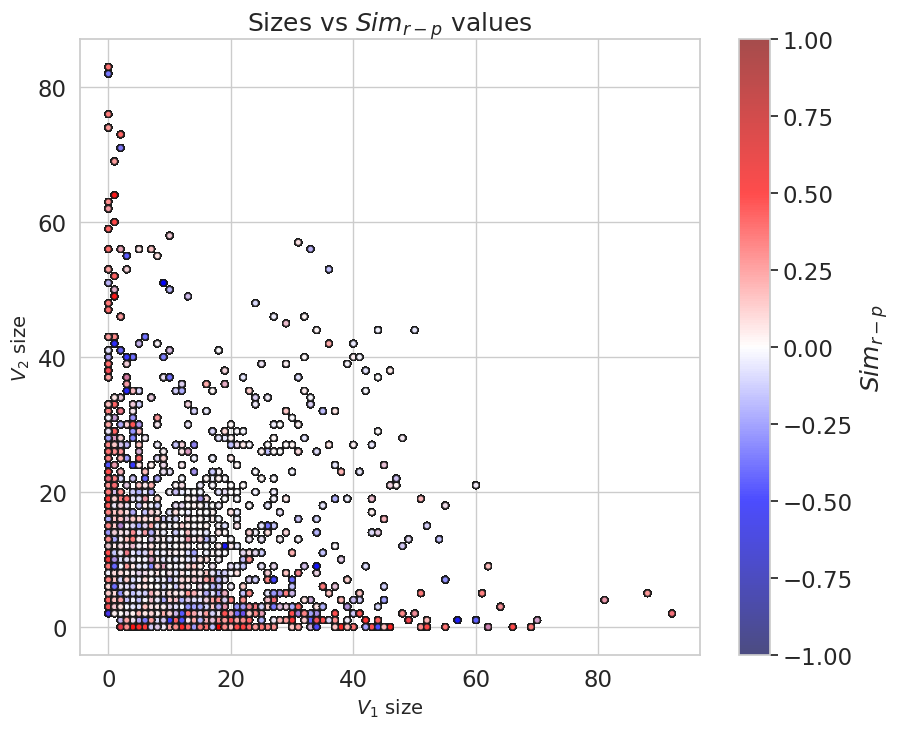

In [57]:
import matplotlib as mpl
plt.figure(figsize=(10, 8))
df_rq4_zoom = df_rq4[df_rq4['chunk_size']< 100]
# df_rq4_zoom = df_rq4
x = df_rq4_zoom['v1_size']
y = df_rq4_zoom['v2_size']
z = df_rq4_zoom['sim_rp']
# fig = plt.figure(figsize=(6, 6))
plt.scatter(x,y,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 20,
           c=z, cmap='seismic', vmin=-1, vmax=1)
plt.title('Sizes vs $Sim_{r-p}$ values', fontsize=18)
plt.colorbar(label='$Sim_{r-p}$', cmap='seismic')
plt.xlabel('$V_1$ size', fontsize=14)
plt.ylabel('$V_2$ size', fontsize=14)
plt.show()

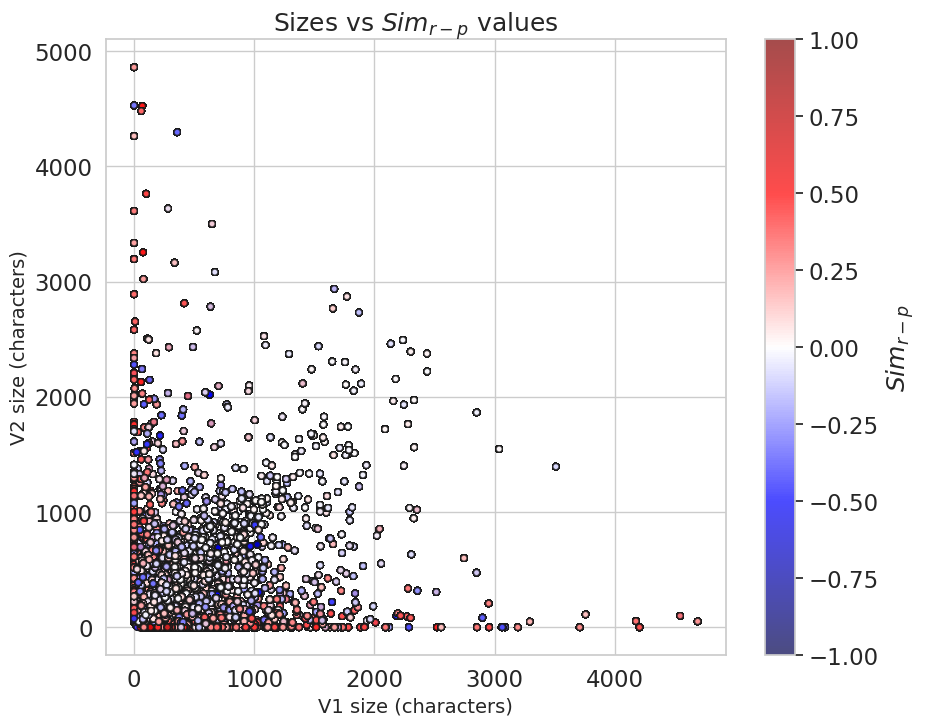

In [58]:
import matplotlib as mpl
plt.figure(figsize=(10, 8))
df_rq4_zoom = df_rq4[df_rq4['chunk_size_char']< 5000]
# df_rq4_zoom = df_rq4
x = df_rq4_zoom['v1_size_char']
y = df_rq4_zoom['v2_size_char']
z = df_rq4_zoom['sim_rp']
# fig = plt.figure(figsize=(6, 6))
plt.scatter(x,y,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 20,
           c=z, cmap='seismic', vmin=-1, vmax=1)
plt.title('Sizes vs $Sim_{r-p}$ values', fontsize=18)
plt.colorbar(label='$Sim_{r-p}$', cmap='seismic')
plt.xlabel('V1 size (characters)', fontsize=14)
plt.ylabel('V2 size (characters)', fontsize=14)
plt.show()

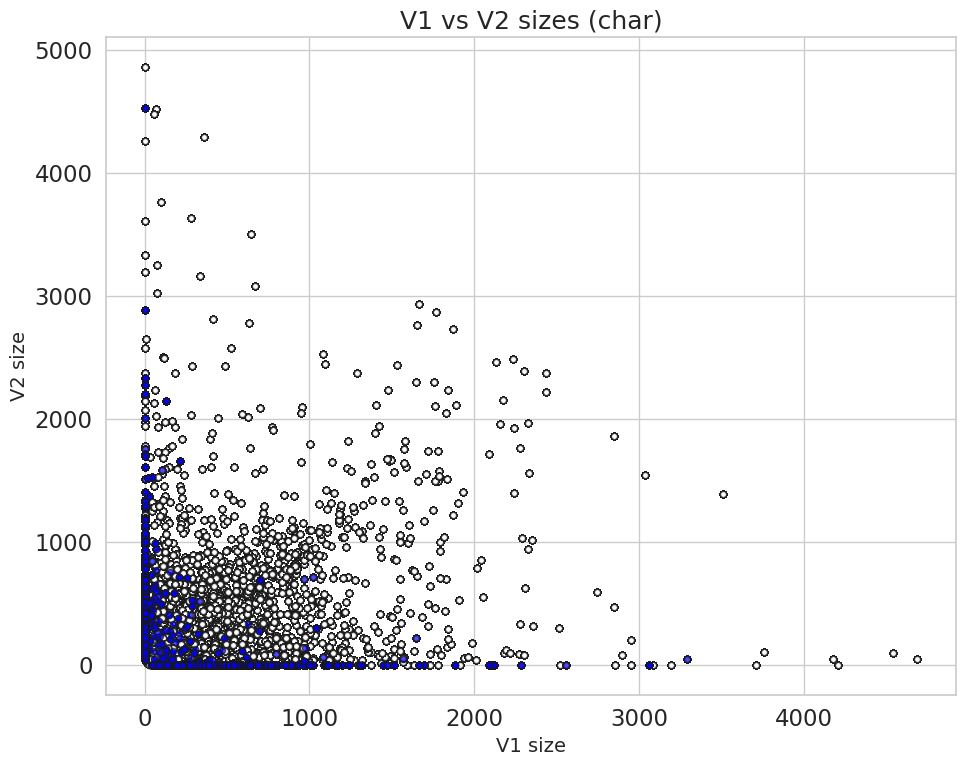

In [59]:
import matplotlib as mpl
plt.figure(figsize=(10, 8))
df_rq4_zoom = df_rq4[df_rq4['chunk_size_char']<= 5000]
highest = df_rq4_zoom[df_rq4_zoom['sim_rp']>0.5]
remaining = df_rq4_zoom[df_rq4_zoom['sim_rp']<=0.5]
# df_rq4_zoom = df_rq4[df_rq4['solution_size']< 100]
x = remaining['v1_size_char']
y = remaining['v2_size_char']

# fig = plt.figure(figsize=(6, 6))
plt.scatter(x,y,
           linewidths=1, alpha=.7,
           edgecolor='k', c='white',
           s = 20)
x = highest['v1_size_char']
y = highest['v2_size_char']
plt.scatter(x,y,
           linewidths=1, alpha=.7,
           edgecolor='k', c='blue',
           s = 20)
plt.title('V1 vs V2 sizes (char)', fontsize=18)
# plt.colorbar(label='z', cmap='seismic')
plt.xlabel('V1 size', fontsize=14)
plt.ylabel('V2 size', fontsize=14)
# plt.yscale('log')
plt.tight_layout()

# Show the plot
# plt.suptitle('Scatter plot of candidate/resolution and candidate/parents similarity \n', y=1.02, fontsize=16)
# plt.savefig('RQ4_quantitative_scatter_char_v1v2.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipykernel_4955/1290285815.py:17: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[0,0].scatter(x,y,
/tmp/ipykernel_4955/1290285815.py:42: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[0,1].scatter(x,y,
/tmp/ipykernel_4955/1290285815.py:66: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[1,0].scatter(x,y,
/tmp/ipykernel_4955/1290285815.py:93: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[1,1].scatter(x

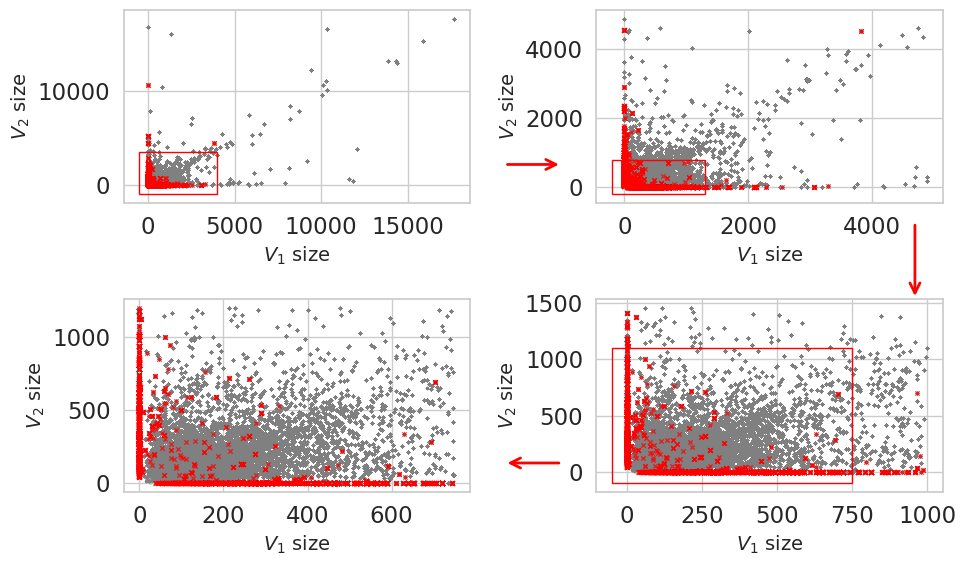

In [60]:
from matplotlib.patches import Rectangle
fig, axs = plt.subplots(2, 2, figsize=(10, 6))


df_rq4_zoom = df_rq4
highest = df_rq4_zoom[df_rq4_zoom['sim_rp']>0.5]
remaining = df_rq4_zoom[df_rq4_zoom['sim_rp']<=0.5]
x = remaining['v1_size_char']
y = remaining['v2_size_char']

axs[0,0].scatter(x,y,
           linewidths=1, alpha=.1,
            c='gray',
           s = 2)
x = highest['v1_size_char']
y = highest['v2_size_char']
axs[0,0].scatter(x,y,
           linewidths=1, alpha=.7,
           edgecolor='k', c='red', marker='x',
           s = 10)
axs[0,0].set_xlabel('$V_1$ size', fontsize=14)
axs[0,0].set_ylabel('$V_2$ size', fontsize=14)
axs[0,0].add_patch(Rectangle((-500, -1000), 4500, 4500, facecolor="none", ec='red', lw=1))

arrowprops = dict(arrowstyle="->", linewidth=2, color='red')
arrow1_1 = plt.annotate('', xy=(-0.1,0.2), xycoords=axs[0,1].transAxes, xytext=(1.1,0.2), textcoords=axs[0,0].transAxes, arrowprops=arrowprops)
arrow1_1.set_in_layout(False)


df_rq4_zoom = df_rq4[(df_rq4['v1_size_char']<5000) & (df_rq4['v2_size_char']<5000)]
highest = df_rq4_zoom[df_rq4_zoom['sim_rp']>0.5]
remaining = df_rq4_zoom[df_rq4_zoom['sim_rp']<=0.5]
x = remaining['v1_size_char']
y = remaining['v2_size_char']

axs[0,1].scatter(x,y,
           linewidths=1, alpha=.1,
            c='gray',
           s = 2)
x = highest['v1_size_char']
y = highest['v2_size_char']
axs[0,1].scatter(x,y,
           linewidths=1, alpha=.7,
           edgecolor='k', c='red', marker='x',
           s = 10)
axs[0,1].set_xlabel('$V_1$ size', fontsize=14)
axs[0,1].set_ylabel('$V_2$ size', fontsize=14)
axs[0,1].add_patch(Rectangle((-200, -200), 1500, 1000, facecolor="none", ec='red', lw=1))

arrow1_2 = plt.annotate('', xy=(0.92,1), xycoords=axs[1,1].transAxes, xytext=(0.92,-0.1), textcoords=axs[0,1].transAxes, arrowprops=arrowprops)
arrow1_2.set_in_layout(False)


df_rq4_zoom = df_rq4[(df_rq4['v1_size_char']<750) & (df_rq4['v2_size_char']<1200)]
highest = df_rq4_zoom[df_rq4_zoom['sim_rp']>0.5]
remaining = df_rq4_zoom[df_rq4_zoom['sim_rp']<=0.5]
x = remaining['v1_size_char']
y = remaining['v2_size_char']

axs[1,0].scatter(x,y,
           linewidths=1, alpha=.1,
            c='gray',
           s = 2)
x = highest['v1_size_char']
y = highest['v2_size_char']
axs[1,0].scatter(x,y,
           linewidths=1, alpha=.7,
           edgecolor='k', c='red', marker='x',
           s = 10)
axs[1,0].set_xlabel('$V_1$ size', fontsize=14)
axs[1,0].set_ylabel('$V_2$ size', fontsize=14)


arrow1_3 = plt.annotate('', xy=(1.1,0.15), xycoords=axs[1,0].transAxes, xytext=(-0.1,0.15), textcoords=axs[1,1].transAxes, arrowprops=arrowprops)
arrow1_3.set_in_layout(False)





df_rq4_zoom = df_rq4[(df_rq4['v1_size_char']<1000) & (df_rq4['v2_size_char']<1500)]
highest = df_rq4_zoom[df_rq4_zoom['sim_rp']>0.5]
remaining = df_rq4_zoom[df_rq4_zoom['sim_rp']<=0.5]
x = remaining['v1_size_char']
y = remaining['v2_size_char']

axs[1,1].scatter(x,y,
           linewidths=1, alpha=.1,
            c='gray',
           s = 2)
x = highest['v1_size_char']
y = highest['v2_size_char']
axs[1,1].scatter(x,y,
           linewidths=1, alpha=.7,
           edgecolor='k', c='red', marker='x',
           s = 10)
axs[1,1].set_xlabel('$V_1$ size', fontsize=14)
axs[1,1].set_ylabel('$V_2$ size', fontsize=14)
axs[1,1].add_patch(Rectangle((-50, -100), 800, 1200, facecolor="none", ec='red', lw=1))

plt.tight_layout()

plt.savefig('RQ4_quantitative_scatter_char_high_sim_rp.png', dpi=300, bbox_inches='tight')
plt.show()

In [61]:
df_rq4[(df_rq4['sim_rp']>0.5) & ((df_rq4['v1_size_char']==0) | (df_rq4['v2_size_char']==0))]

,chunk_id,candidate_id,v1_gestalt_sim,v2_gestalt_sim,solution_gestalt_sim,aggregate_mean_gestalt,aggregate_harmonic_mean_gestalt,aggregate_min_gestalt,aggregate_max_gestalt,sim_rp,...,url,project,project_user,project_name,path,file_name,sha,leftsha,rightsha,basesha
15213,1086962,7,0.000000,0.945501,0.992021,0.472750,0.0,0.0,0.945501,0.519271,...,https://github.com/MCTCP/TerrainControl,MCTCP/TerrainControl,MCTCP,TerrainControl,MCTCP/TerrainControl/common/src/main/java/com/...,WorldSettings.java,2c4a428661a749c8e09f7c4b8da96a3d4588851e,40e42a02b522ba985ac97134e2fb3389eb7ed48e,7e322fe7e3acb9c05e1264c616dae11607aefd87,17054a5a83c27948611708bf324a7c547c5237f1
15271,1086962,65,0.000000,0.942821,0.989333,0.471410,0.0,0.0,0.942821,0.517923,...,https://github.com/MCTCP/TerrainControl,MCTCP/TerrainControl,MCTCP,TerrainControl,MCTCP/TerrainControl/common/src/main/java/com/...,WorldSettings.java,2c4a428661a749c8e09f7c4b8da96a3d4588851e,40e42a02b522ba985ac97134e2fb3389eb7ed48e,7e322fe7e3acb9c05e1264c616dae11607aefd87,17054a5a83c27948611708bf324a7c547c5237f1
15278,1086962,72,0.000000,0.953459,1.000000,0.476730,0.0,0.0,0.953459,0.523270,...,https://github.com/MCTCP/TerrainControl,MCTCP/TerrainControl,MCTCP,TerrainControl,MCTCP/TerrainControl/common/src/main/java/com/...,WorldSettings.java,2c4a428661a749c8e09f7c4b8da96a3d4588851e,40e42a02b522ba985ac97134e2fb3389eb7ed48e,7e322fe7e3acb9c05e1264c616dae11607aefd87,17054a5a83c27948611708bf324a7c547c5237f1
15293,1086962,87,0.000000,0.926452,0.972900,0.463226,0.0,0.0,0.926452,0.509674,...,https://github.com/MCTCP/TerrainControl,MCTCP/TerrainControl,MCTCP,TerrainControl,MCTCP/TerrainControl/common/src/main/java/com/...,WorldSettings.java,2c4a428661a749c8e09f7c4b8da96a3d4588851e,40e42a02b522ba985ac97134e2fb3389eb7ed48e,7e322fe7e3acb9c05e1264c616dae11607aefd87,17054a5a83c27948611708bf324a7c547c5237f1
15300,1086962,94,0.000000,0.952141,0.998679,0.476071,0.0,0.0,0.952141,0.522608,...,https://github.com/MCTCP/TerrainControl,MCTCP/TerrainControl,MCTCP,TerrainControl,MCTCP/TerrainControl/common/src/main/java/com/...,WorldSettings.java,2c4a428661a749c8e09f7c4b8da96a3d4588851e,40e42a02b522ba985ac97134e2fb3389eb7ed48e,7e322fe7e3acb9c05e1264c616dae11607aefd87,17054a5a83c27948611708bf324a7c547c5237f1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4493794,932012,497,0.352459,0.000000,0.687023,0.176230,0.0,0.0,0.352459,0.510793,...,https://github.com/apache/lucene-solr,apache/lucene-solr,apache,lucene-solr,apache/lucene-solr/lucene/replicator/src/test/...,TestNRTReplication.java,82ecccf8e9efbafd13c8a66362e8bebf5dca1c29,7af83c486b50ceb13d58e79dd65c158bc96130dc,d9f20f53edd9dc5895ad18e1844fb4ae9652189e,8889469b8bb1445133c39069adfdb5db028dbad1
4493796,932012,499,0.201342,0.000000,1.000000,0.100671,0.0,0.0,0.201342,0.899329,...,https://github.com/apache/lucene-solr,apache/lucene-solr,apache,lucene-solr,apache/lucene-solr/lucene/replicator/src/test/...,TestNRTReplication.java,82ecccf8e9efbafd13c8a66362e8bebf5dca1c29,7af83c486b50ceb13d58e79dd65c158bc96130dc,d9f20f53edd9dc5895ad18e1844fb4ae9652189e,8889469b8bb1445133c39069adfdb5db028dbad1
4494044,932012,747,0.345679,0.000000,0.682171,0.172840,0.0,0.0,0.345679,0.509331,...,https://github.com/apache/lucene-solr,apache/lucene-solr,apache,lucene-solr,apache/lucene-solr/lucene/replicator/src/test/...,TestNRTReplication.java,82ecccf8e9efbafd13c8a66362e8bebf5dca1c29,7af83c486b50ceb13d58e79dd65c158bc96130dc,d9f20f53edd9dc5895ad18e1844fb4ae9652189e,8889469b8bb1445133c39069adfdb5db028dbad1
4494217,932012,920,0.349076,0.000000,0.676923,0.174538,0.0,0.0,0.349076,0.502385,...,https://github.com/apache/lucene-solr,apache/lucene-solr,apache,lucene-solr,apache/lucene-solr/lucene/replicator/src/test/...,TestNRTReplication.java,82ecccf8e9efbafd13c8a66362e8bebf5dca1c29,7af83c486b50ceb13d58e79dd65c158bc96130dc,d9f20f53edd9dc5895ad18e1844fb4ae9652189e,8889469b8bb1445133c39069adfdb5db028dbad1


In [62]:
len(df_rq4[(df_rq4['sim_rp']>0.5) & ((df_rq4['v1_size_char']==0) | (df_rq4['v2_size_char']==0))])/len(df_rq4[(df_rq4['sim_rp']>0.5)])

0.93322070069358

In [63]:
len(df_rq4[(df_rq4['sim_rp']>0.5) & ((df_rq4['v1_size_char']==0) | (df_rq4['v2_size_char']==0))]['chunk_id'].unique())

1121

In [64]:
len(df_rq4[(df_rq4['sim_rp']>0.5)]['chunk_id'].unique())

1306

In [65]:
df_rq4[(df_rq4['sim_rp']>0.5) & ((df_rq4['v1_size_char']!=0) & (df_rq4['v2_size_char']!=0))][['chunk_id', 'candidate_id', 'sim_rp','v1_size_char', 'v2_size_char', 'candidate_size_char', 'solution_size_char', 'solution_gestalt_sim']].sort_values('sim_rp', ascending=False)

,chunk_id,candidate_id,sim_rp,v1_size_char,v2_size_char,candidate_size_char,solution_size_char,solution_gestalt_sim
3408890,1069538,795,0.899646,1038,304,790,26,1.000000
1918497,939139,71,0.832673,702,692,1015,64,1.000000
3402895,939111,77,0.825723,702,692,793,68,1.000000
2508236,1302733,697,0.820546,181,586,636,28,1.000000
144603,1117715,442,0.820546,181,586,654,28,1.000000
...,...,...,...,...,...,...,...,...
1653425,1044460,767,0.500321,705,1,705,478,0.880952
456835,1293320,426,0.500237,2,2010,1609,289,0.662739
3379224,1391948,332,0.500100,1310,6,915,1141,0.979062
1501461,794762,256,0.500093,29,456,367,94,0.908108


In [68]:
df_rq4[(df_rq4['sim_rp']>0.5)&(df_rq4['v2_size_char']==0)][['chunk_id', 'sim_rp', 'v1_size_char', 'v2_size_char', 'candidate_size_char', 'solution_size_char', 'solution_gestalt_sim']]

,chunk_id,sim_rp,v1_size_char,v2_size_char,candidate_size_char,solution_size_char,solution_gestalt_sim
20795,1009512,0.572953,171,0,85,125,0.992308
20808,1009512,0.578663,171,0,85,125,0.996139
20847,1009512,0.518677,171,0,85,125,0.910569
20857,1009512,0.507131,171,0,85,125,0.859649
20860,1009512,0.509790,171,0,85,125,0.864629
...,...,...,...,...,...,...,...
4493775,932012,0.886332,391,0,96,44,0.989011
4493794,932012,0.510793,391,0,96,44,0.687023
4493796,932012,0.899329,391,0,96,44,1.000000
4494044,932012,0.509331,391,0,96,44,0.682171


In [70]:
df_rq4[['chunk_id', 'sim_rp', 'v1_size_char', 'v2_size_char']].sort_values('sim_rp', ascending=False).head(20)

,chunk_id,sim_rp,v1_size_char,v2_size_char
3224507,778156,0.993744,0,1077
3528863,978781,0.960725,305,0
685830,776973,0.953069,255,0
838329,934600,0.952033,0,900
4452855,985751,0.951380,0,696
1519736,1149033,0.950994,1317,0
3093715,985381,0.950324,863,0
4287764,806936,0.949066,541,0
3365007,778977,0.946932,0,559
1521589,822303,0.943590,0,174


#### Further analyzing the differences in the 16 chunks

In [71]:
chunk_ids = [935693,
939111,
939139,
976336,
985205,
1016096,
1031584,
1055419,
1117715,
1370605
]

In [72]:
df_dataset[df_dataset['chunk_id'].isin(chunk_ids)]

,chunk_id,developerdecision,line_start,line_end,line_separator,kind_conflict,url,project,project_user,project_name,path,file_name,sha,leftsha,rightsha,basesha
29204,935693,Combination,1016,1040,1022,"Attribute, Comment, Method declaration, Method...",https://github.com/elastic/elasticsearch,elastic/elasticsearch,elastic,elasticsearch,elastic/elasticsearch/core/src/main/java/org/e...,IndexShard.java,27d8509f0e95e598d725bc713da07d5b433631c6,99e328c9bfb87a84943ab3357d5d2f0cc07c12a5,7bca97bba6ac012f875d758cc5f49546396b20e2,5d001d15781fc56b3bf6e7e54f2d0d736cd602e4
31675,939111,Combination,83,93,88,"Attribute, Comment, Variable",https://github.com/sunsuk7tp/MyCassandra,sunsuk7tp/MyCassandra,sunsuk7tp,MyCassandra,sunsuk7tp/MyCassandra/MyCassandra-0.2.1/src/ja...,MySQLInstance.java,89bbf325cb6a19a9dddccbf53a82253196c7822b,64b92792b5fdc074774a138a2bde6b1e28645373,55151503cce8aa43dc9e6fc41bf22d87d1110495,ef226b36c7b0fadd44d06f4687a208f6c97ae37a
31693,939139,Combination,83,93,88,"Attribute, Comment, Variable",https://github.com/sunsuk7tp/MyCassandra,sunsuk7tp/MyCassandra,sunsuk7tp,MyCassandra,sunsuk7tp/MyCassandra/MyCassandra-0.2.1/src/ja...,MySQLInstance.java,07a84c9465f038d787aaadcddec5b102d7e02e6f,64b92792b5fdc074774a138a2bde6b1e28645373,55151503cce8aa43dc9e6fc41bf22d87d1110495,ef226b36c7b0fadd44d06f4687a208f6c97ae37a
42470,976336,Combination,144,154,149,Method invocation,https://github.com/FrontlineSMS-Credit/plugin-...,FrontlineSMS-Credit/plugin-paymentview,FrontlineSMS-Credit,plugin-paymentview,FrontlineSMS-Credit/plugin-paymentview/src/mai...,MpesaPaymentService.java,36575c886e389f565ce68e002c83a297e1fa8035,707bdd48e73b4ae86752f4714f10ff350167591a,efba4fff6aab8589ec99133f99af5b641b97c113,941efff4e663bb9b5f565f7fd3c76c84fba4025d
47061,985205,Combination,963,1011,991,"Annotation, Comment, Method declaration, Metho...",https://github.com/CloudStack-extras/CloudStac...,CloudStack-extras/CloudStack-archive,CloudStack-extras,CloudStack-archive,CloudStack-extras/CloudStack-archive/server/sr...,SnapshotManagerImpl.java,2740ba6c40b6554e3e55688f84f226f600cbb13c,9e03518c94d67318f2afd01f0c2471d8e7667c11,cde98c9ba3b3be2e7de96c2b9016841ad4b27ab6,9228088ce371c22211fbc77683abe1ffae3e7590
57994,1016096,Combination,135,143,140,Comment,https://github.com/nrao/nubbles,nrao/nubbles,nrao,nubbles,nrao/nubbles/src/edu/nrao/dss/client/ProjectEm...,ProjectEmailPagingToolBar.java,e750bcabe73d9a71e72bd7cd25fff6fba556a634,dd10a82702681f1edda65ceff4abbb96f5e49f5a,f22ece90c5d37be66a067d346b622fc49a761c63,bf28d7b68cf01f06cbe82208d9d9214ab468c5a1
60644,1031584,Combination,110,119,117,"For statement, Method invocation",https://github.com/fabric8io/fabric8,fabric8io/fabric8,fabric8io,fabric8,fabric8io/fabric8/fabric-zookeeper/src/main/ja...,KarafAgentRegistration.java,804bedf46afe6f9c5ef509a8dc7f44184634e80d,34b2d8b2acb8261f7b4952401ed23817f0ac66b8,5468da98f20c665b169272b85411b13ba8a2ff62,fa3935edb16251722d100d47edc6ebe2c2798ec5
67293,1055419,Combination,299,308,303,"Comment, Method invocation, Return statement",https://github.com/impetus-opensource/Kundera,impetus-opensource/Kundera,impetus-opensource,Kundera,impetus-opensource/Kundera/src/kundera-cassand...,PelopsClientFactory.java,123a84661596222974eeaa79b30de0d44491277a,afb215c822ce8e199986f24fe6d68400a39e81a5,ffd1b5aa8a2cc435afdc96b7762ade64f9c486fb,7202ca52bbcd5375208847ae444bb39c4245ff87
86411,1117715,Combination,51,78,59,"Comment, Method declaration, Method invocation...",https://github.com/jtalks-org/jcommune,jtalks-org/jcommune,jtalks-org,jcommune,jtalks-org/jcommune/jcommune/jcommune-model/sr...,ObjectsFactory.java,2a2d1c249ac1aea6f0d14a960c60b63e06bf0749,a1a8599317b6d9d61da7a44915d622d25dc640aa,9c70ae4194dd63fada32e35b74ed880a7cd03418,119f2dd8cff2daab618cfcafb7b6b13738c57378
135830,1370605,Combination,23,41,34,Import,https://github.com/dotCMS/core,dotCMS/core,dotCMS,core,dotCMS/core/src/com/dotmarketing/osgi/GenericB...,GenericBundleActivator.java,f3dc3e1019bd2800f681fe20fa0ed9f071d3f903,3756daa45dc7bf9

In [73]:
len(df_rq4[df_rq4['chunk_id'].isin(chunk_ids)]['chunk_id'].unique())

10

In [74]:
df_rq4['sol_conf_diff'] = df_rq4['chunk_size_char'] - df_rq4['solution_size_char']

In [75]:
df_rq4[df_rq4['sim_rp']<-0.5]['sol_conf_diff'].median()

887.0

In [76]:
df_rq4[df_rq4['sim_rp']>=-0.5]['sol_conf_diff'].median()

222.0

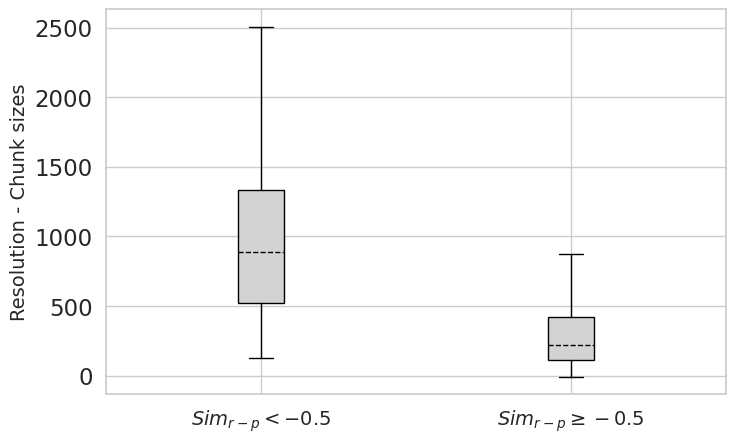

In [77]:
# Create a boxplot
plt.figure(figsize=(8, 5))  # Set the figure size
plt.boxplot([df_rq4[df_rq4['sim_rp']<-0.5]['sol_conf_diff'], df_rq4[df_rq4['sim_rp']>=-0.5]['sol_conf_diff']#, df_new['resolution_parents_gestalt_sim']#
            ], 
            patch_artist=True,  # To fill the box with color
#             widths=0.5,  # Width of the box
            medianprops=dict(color='black', linestyle='--'),  # Color of the median line
            boxprops=dict(facecolor='lightgray', color='black'),  # Color of the box
            whiskerprops=dict(color='black'),  # Color of the whiskers
            capprops=dict(color='black'),  # Color of the caps
            showfliers=False)  # Properties of the outliers
# plt.xlabel('Your X Label')
plt.ylabel('Resolution - Chunk sizes', fontsize=14)
plt.xticks([1, 2#, 3
           ], ['$Sim_{r-p}<-0.5$', '$Sim_{r-p}\geq-0.5$'#, 'Solution vs parents (mean)'
                      ], fontsize=14)
# plt.title('Similarity between random candidates and parents \n using each aggregation function', fontsize=16)
plt.savefig('figures/RQ4_sizes_analysis.png', dpi=300)
plt.show()  # Show the plot

#### Parents' similarity

In [78]:
df_parents = pd.read_csv('results_parents_similarity.csv')
df_parents

FileNotFoundError: [Errno 2] No such file or directory: 'results_parents_similarity.csv'

In [ ]:
df_parents['error'].unique()

In [ ]:
df_rq4 = df_rq4.merge(df_parents, on='chunk_id', how='left')
df_rq4

In [ ]:
plt.figure(figsize=(8, 6))

# df_rq4_zoom = df_rq4
x = df_rq4['v1_v2_similarity']
y = df_rq4['aggregate_mean_gestalt']
plt.scatter(x,y,
           alpha=.7,
           edgecolor='k',
           s = 20,
          vmin=-1, vmax=1)
# plt.title('Sizes vs $Sim_{r-p}$ values', fontsize=18)
plt.xlabel('Similarity between $V_1$ and $V_2$', fontsize=14)
plt.ylabel('Candidate vs Parents similarity', fontsize=14)
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))

# df_rq4_zoom = df_rq4
x = df_rq4[df_rq4['sim_pr']>0.5]['v1_v2_similarity']
y = df_rq4[df_rq4['sim_pr']>0.5]['aggregate_mean_gestalt']
plt.scatter(x,y,
           alpha=.7,
           edgecolor='k',
           s = 20,
          vmin=-1, vmax=1)
# plt.title('Sizes vs $Sim_{r-p}$ values', fontsize=18)
plt.xlabel('Similarity between $V_1$ and $V_2$', fontsize=14)
plt.ylabel('Candidate vs Parents similarity', fontsize=14)
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))

# df_rq4_zoom = df_rq4
x = df_rq4[df_rq4['sim_pr']<-0.5]['v1_v2_similarity']
y = df_rq4[df_rq4['sim_pr']<-0.5]['aggregate_mean_gestalt']
plt.scatter(x,y,
           alpha=.7,
           edgecolor='k',
           s = 20,
          vmin=-1, vmax=1)
# plt.title('Sizes vs $Sim_{r-p}$ values', fontsize=18)
plt.xlabel('Similarity between $V_1$ and $V_2$', fontsize=14)
plt.ylabel('Candidate vs Parents similarity', fontsize=14)
plt.show()